# Programación para Análisis de datos

## Análisis de datos bivariado. Parte I

Incluye tablas de contingencia, tablas dinámicas, visualizaciones entre categóricas y entre categóricas y numéricas, así como análisis de __correlación (este último conviene pasarlo a un notebook independiente)__
En otros notebooks se verán: ANOVA de una vía, ANOVA de medidas repetidas, pruebas de hipótesis, regresión y otras técnicas

## Caso: Veterans' Administration Lung Cancer study

### Mtra. Gisel Hernández Chávez

Ensayo aleatorizado de dos regímenes de tratamiento para el cáncer de pulmón. Este es un conjunto de datos de análisis de supervivencia estándar.https://rdrr.io/cran/survival/man/veteran.html

__Sigificado de los campos__

__trt__:	1=standard 2=test  Dos tipos de tratamiento para el ensayo clínico / nominal

__celltype__:	1=squamous, 2=smallcell, 3=adeno, 4=large     / nominal

__time__:	survival time   (días de supervivencia)           / razón

__status__:	censoring status  / nominal

__karno__:	Karnofsky performance score (100=good)       / ordinal (algunos pueden considerarlo de intervalo) Por ejemplo: el mismo oncólogo fue el que determinó el karno de cada paciente.

    A standard way of measuring the ability of cancer patients to perform ordinary tasks. The Karnofsky Performance Status scores range from 0 to 100. A higher score means the patient is better able to carry out daily activities.

    "The scoring is subjectively assigned by a health professional based on the following hierarchical scale: 100=normal, no evidence of disease; 90=able to perform normal activity with only minor symptoms; 80=normal activity with effort, some symptoms; 70=able to care for self but unable to do normal activities; 60=requires occasional assistance, care for most needs; 50=requires considerable assistance; 40=disabled, requires special assistance; 30=severely disabled; 20=very sick, requires active supportive treatment; 10=moribund. Intermediate or even decimal scores can be assigned. The tool is named after David A. Karnofsky, who described the scale in 1949."(Ferrucci et.all,2007)

    <div class="csl-entry">Ferrucci, L., Koh, C., Bandinelli, S., &#38; Guralnik, J. M. (2007). Disability, Functional Status, and Activities of Daily Living. <i>Encyclopedia of Gerontology</i>, 427–436. https://doi.org/10.1016/B0-12-370870-2/00075-5</div>

__diagtime__:	months from diagnosis to randomisation   / razón

__age__:	in years                    /razón

__prior__:	prior therapy 0=no, 10=yes  / nominal

__Source__
D Kalbfleisch and RL Prentice (1980), The Statistical Analysis of Failure Time Data. Wiley, New York.

## Preguntas de investigación iniciales

1. ¿Qué grupo de tratamiento tiene mayor tasa de supervivencia después de 1 año (365 días)?
2. ¿Cuál es el estimado de supervivencia de los veteranos, independientemente del tratamiento, a través de los primeros 200 días?
3. ¿Puedo predecir con una precisión mayor al 60% si un paciente muere o no antes de 1000 días? Esta es una pregunta de clasificación. La variable dependiente es binaria y se puede resolver, entre otras técnicas con regresión logística o árboles.
4. ¿Puedo predecir con más de 0.65 de concordancia la probabilidad y el riesgo de supervivencia de un veterano en un tiempo dado,  conociendo 'trt', 'celltype', 'karno', 'diagtime', 'age' y 'prior'? Aquí son variables dependientes continuas y se usan otros tipos de regresiones.

### Unidad de observación

+ Cada fila de la tabla: veterano con cáncer de pulmón ...

### Unidad de análisis

| __Pregunta de investigación__ | __Unidad de análisis__ |
| --------------------------------------------------- | ------------------ | 
| Qué trt tiene mayor superv. después 1 año?                              | grupo tratamiento |  
| ---------------------------------------------------- | ------------------ | 
| Estimado de supervivencia a los 1000 días (1/0) | veterano                  | 
| ---------------------------------------------------- | ------------------ | 
| Estimado de supervivencia en 200 días | veterano                  | 
| ---------------------------------------------------- | ------------------ | 
| Modelo supervivencia de veterano concordancia >0.65 | veterano           | 


## ¿Qué es el análisis bivariado?

El análisis bivariado es una de las formas más simples de análisis cuantitativo (estadístico).Implica el análisis de dos variables (a menudo denominadas X, Y), con el fin de determinar la relación empírica entre ellas.

+ Puede ser útil para probar hipótesis simples de asociación. 
+ Puede ayudar a determinar en qué medida es más fácil conocer y predecir el valor de una variable (variable dependiente) si conocemos el valor de la otra variable (variable independiente) 
+ Puede contrastarse con el análisis univariado en el que solo se analiza una variable.
+ Al igual que el análisis univariado, __puede ser descriptivo o inferencial__. 

El análisis bivariado es un caso especial (dos variables) de análisis multivariado, donde múltiples relaciones entre múltiples variables se examinan simultáneamente.

### Algunas diferencias entre análisis univariado y bivariado
__Análisis univariado__:

1. Involucra a una sola variable
2. No se aplica para analizar relaciones entre variables, sean o no causales
3. Su principal propósito es descriptivo y se calculan medidas de tendencia central, de dispersión 
4. Es común determinar y graficar las distribuciones de frecuencia
5. Para el análisis univariado gráfico se emplean: gráficas de barra, histogramas, gráficas de pie, de líneas, de cajas y bigotes. 
6. __Ejemplo de pregunta de investigación__: ¿Cuántos pacientes de cada tipo de célula hay en la muestra, de manera que podamos determinar si la misma está balanceada por este criterio?

__Análisis bivariado__:

1. Involucra a dos variables que se analizan simultáneamente 
2. Puede usarse para análisis de relaciones, sean o no causales.
3. Tiene tanto propósitos descriptivos como inferenciales.
4. Puede responder a preguntas de relación entre variables, sean o no causales.
5. Utiliza técnicas de análisis de correlación, pruebas de hipótesis, análisis de regresión, clasificación, clustering, etc.
6. Es común determinar y graficar las distribuciones conjuntas.
7. Emplea tablas de contingencia para analizar frecuencia y porcentaje de elementos en la muestra  si hay variables categóricas.
8. __Ejemplo de pregunta de investigación__: ¿Existe una fuerte relación entre el tipo de célula cancerígena y el tiempo de supervivencia de un paciente de cáncer de pulmón?

### Algunas discrepancias entre los científicospara clasificar una técnica como univariada o bivariada

Por ejemplo, ANOVA es una técnica que unos consideran univariada porque tiene una sola variable dependiente. Otros la consideran bivariada porque se requieren al menos dos grupos de muestras de la variable dependiende y para la separación en grupos se requiere una variable categórica (por lo que de esta manera interviene una segunda variable). En este curso la vamos a aplicar dentro del análisis bivariado.

Otro ejemplo es el análisis de una variable en el tiempo para un sujeto (serie de tiempo) que algunos consideran como univariado.

En otras palabras, cuando vean el uso del término univariado en la literatura, deben ver si lo están considerando así porque hay una sola variable dependiente o porque hay una sola independiente o porque no se analizan relaciones sino que se está describiendo a una sola variable.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import phik # Coeficiente de correlación que funciona bien con variables de todo tipo
from phik import resources, report

In [ ]:
from scipy import stats

In [ ]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


## Cargar tipos de las columnas y archivo resultante del análisis univariado

In [9]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided.
col

In [1]:
# Cargar archivos de tipos que no son datetime
non_date = pd.read_csv('tipos_veteranos.csv',encoding='utf-8')
dtypes = dict(zip(list(non_date.columnas),list()))

# Cargar archivo de tipos datetime, si hubiere si se guardó como array de numpy
#date_col_list = np.load(tray + "lista_fechas.npy", allow_pickle=True)

import pickle
# Si se guardó como archivo binario con pickle
'''with open('lista_fechas.pkl', 'rb') as f:
    
    date_col_list = pickle.load(f)'''

NameError: name 'pd' is not defined

In [9]:
# df = pd.read_csv('dataset-25346_dum.csv', dtype=dtypes, parse_dates=list(date_col_list), encoding='utf-8')
df = pd.read_csv('dataset-25346_dum.csv', dtype=dtypes, encoding='utf-8')
# 'latin-1'

In [10]:
df_backup = df.copy()  # es copia profunda

In [11]:
df

trt prior  celltype  time  karno  diagtime  age  trt_1  trt_2  \
0     1     0  squamous    72     60         7   69      1      0   
1     1    10  squamous   411     70         5   64      1      0   
2     1     0  squamous   228     60         3   38      1      0   
3     1    10  squamous   126     60         9   63      1      0   
4     1    10  squamous   118     70        11   65      1      0   
..   ..   ...       ...   ...    ...       ...  ...    ...    ...   
132   2     0     large   133     75         1   65      0      1   
133   2     0     large   111     60         5   64      0      1   
134   2    10     large   231     70        18   67      0      1   
135   2     0     large   378     80         4   65      0      1   
136   2     0     large    49     30         3   37      0      1   

     celltype_adeno  celltype_large  celltype_smallcell  celltype_squamous  \
0                 0               0                   0                  1   
1                 0               0                   0                  1   
2                 0               0                   0                  1   
3                 0               0                   0                  1   
4                 0               0                   0                  1   
..              ...             ...                 ...                ...   
132               0               1                   0                  0   
133               0               1                   0                  0   
134               0               1                   0                  0   
135               0               1                   0                  0   
136               0               1                   0                  0   

     status_0  status_1  prior_0  prior_10  log_time  
0           0         1        1         0  1.857332  
1           0         1        0         1  2.613842  
2           0         1        1         0  2.357935  
3           0         1        0         1  2.100371  
4           0         1        0         1  2.071882  
..        ...       ...      ...       ...       ...  
132         0         1        1         0  2.123852  
133         0         1        1         0  2.045323  
134         0         1        0         1  2.363612  
135         0         1        1         0  2.577492  
136         0         1        1         0  1.690196  

[137 rows x 18 columns]

In [12]:
# Lista de nombres de columnas
col = df.columns
col

Index(['trt', 'prior', 'celltype', 'time', 'karno', 'diagtime', 'age', 'trt_1',
       'trt_2', 'celltype_adeno', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_0', 'status_1', 'prior_0', 'prior_10',
       'log_time'],
      dtype='object')

## Contenido de los dataframes df y df_dum

+ df contiene todas las columnas guardadas en el análisis univariado (originales, logtime y dummies)
+ df_dum no tiene las categóricas originales 'trt', 'prior', 'celltype'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   trt                 137 non-null    category
 1   prior               137 non-null    category
 2   celltype            137 non-null    category
 3   time                137 non-null    int64   
 4   karno               137 non-null    int64   
 5   diagtime            137 non-null    int64   
 6   age                 137 non-null    int64   
 7   trt_1               137 non-null    uint8   
 8   trt_2               137 non-null    uint8   
 9   celltype_adeno      137 non-null    uint8   
 10  celltype_large      137 non-null    uint8   
 11  celltype_smallcell  137 non-null    uint8   
 12  celltype_squamous   137 non-null    uint8   
 13  status_0            137 non-null    uint8   
 14  status_1            137 non-null    uint8   
 15  prior_0             137 non-null    uint

In [14]:
df_dum = df.drop(['trt', 'prior', 'celltype'],axis=1)
df_dum

time  karno  diagtime  age  trt_1  trt_2  celltype_adeno  celltype_large  \
0      72     60         7   69      1      0               0               0   
1     411     70         5   64      1      0               0               0   
2     228     60         3   38      1      0               0               0   
3     126     60         9   63      1      0               0               0   
4     118     70        11   65      1      0               0               0   
..    ...    ...       ...  ...    ...    ...             ...             ...   
132   133     75         1   65      0      1               0               1   
133   111     60         5   64      0      1               0               1   
134   231     70        18   67      0      1               0               1   
135   378     80         4   65      0      1               0               1   
136    49     30         3   37      0      1               0               1   

     celltype_smallcell  celltype_squamous  status_0  status_1  prior_0  \
0                     0                  1         0         1        1   
1                     0                  1         0         1        0   
2                     0                  1         0         1        1   
3                     0                  1         0         1        0   
4                     0                  1         0         1        0   
..                  ...                ...       ...       ...      ...   
132                   0                  0         0         1        1   
133                   0                  0         0         1        1   
134                   0                  0         0         1        0   
135                   0                  0         0         1        1   
136                   0                  0         0         1        1   

     prior_10  log_time  
0           0  1.857332  
1           1  2.613842  
2           0  2.357935  
3           1  2.100371  
4           1  2.071882  
..        ...       ...  
132         0  2.123852  
133         0  2.045323  
134         1  2.363612  
135         0  2.577492  
136         0  1.690196  

[137 rows x 15 columns]

In [15]:
# Para df_dum
nominales = ['trt_2', 'celltype_large', 'celltype_adeno','celltype_smallcell', 'celltype_squamous', 'status_1','prior_10']
ordinales = []  
intervalo = [] 
ranked = ['karno','age'] # también las vamos a considerar de ranking o clasificadas
razon = ['time', 'diagtime', 'age','karno']

### Nota sobre adición de nuevas características

+ 'karno' y 'age' pudieran discretizarse usando binning y hacer exploraciones con las discretizadas
+ Dos funciones de pandas útiles para la discretización son cut() y qcut()

    + cut() Divide los valores en intervalos discretos.Úselo cuando necesite segmentar y ordenar valores de datos en contenedores (bins). Esta función también es útil para pasar de una variable continua a una variable categórica. Por ejemplo, podría convertir edades en grupos de rangos de edad. Admite la agrupación en un número igual de contenedores, o en un conjunto preespecificado de contenedores.
    + qcut() discretiza la variable en grupos de igual tamaño según el rango o los cuantiles de muestra. Por ejemplo, 1000 valores para 10 cuantiles producirían un objeto categórico que indicaría la pertenencia a cuantiles para cada punto de datos.

### Interpretación de covarianza

+ Las __covariazas con signo negativo__ indican que al incrementarse el valor de una variable la otra decrece. Ese es el caso de time y age, por ejemplo. Para el caso de las variables dicotómicas como celltype_smallcell, si la variable como time (día de muerte) crece, entonces para celltype_smallcell es mayor la proporción de que sea 0 (células de cualquier otro tipo).
+ Las __covariazas con signo positivo__ indican que al incrementarse el valor de una variable la otra también se incrementa. Ese es el caso entre time y karno.
+ Las covarianzas con 0 o caso 0 indican que no hay variación conjunta, como es el caso de time con status_1

In [16]:
#pd.qcut?

## Análisis bivariado visual y no visual

Para lo visual puede usar como guía las siguientes imágenes

<div>
<img src="attachment:image-4.png" width="800"/>
</div>



### Diagramas de dispersión (scatter plots) para todos los pares de variables con pairplot()

+ En la diagonal principal- se muestran los diagramas de densidad

Para profundizar en distribuciones bivariadas: https://online.stat.psu.edu/stat414/book/export/html/714

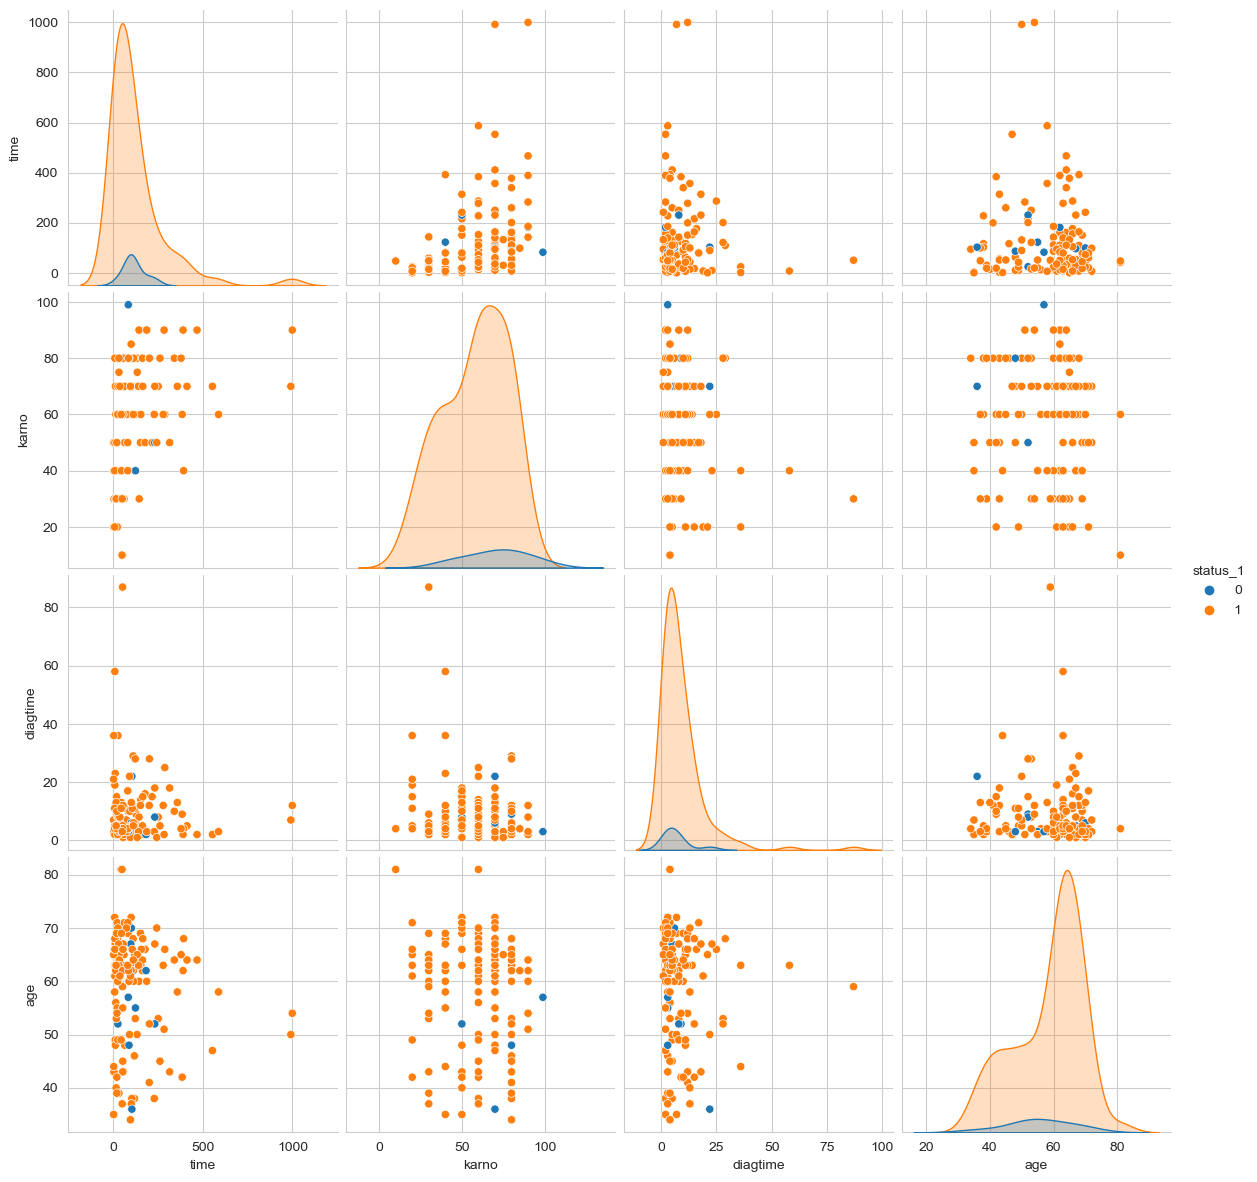

In [17]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data=df[['trt', 'celltype', 'time', 'status_1', 'karno', 'diagtime', 'age',
       'prior']], hue='status_1', height=3)
plt.show()

### Interpretación

+ Los puntos azules son los pacientes censurados, porque se salieron del estudio o porque al finalizar el mismo no habían fallecido. Son muy pocos casos.
+ No hay distribuciones claramente normales en el caso de las variables continuas, ni hay relaciones lineales claras entre las variables continuas
+ Karno es discreta y las demás son variables continuas.

In [18]:
df.columns

Index(['trt', 'prior', 'celltype', 'time', 'karno', 'diagtime', 'age', 'trt_1',
       'trt_2', 'celltype_adeno', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_0', 'status_1', 'prior_0', 'prior_10',
       'log_time'],
      dtype='object')

### Covarianza

En probabilidad y estadística, la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión.

__La covarianza de una variable consigo misma es la varianza__.

In [19]:
#pd.set_option?

In [20]:
df_dum = df_dum[['time', 'karno', 'diagtime', 'age', 'trt_2', 'celltype_adeno','celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10']]
pd.set_option('display.max_columns', 10)
df_dum

time  karno  diagtime  age  trt_2  ...  celltype_large  \
0      72     60         7   69      0  ...               0   
1     411     70         5   64      0  ...               0   
2     228     60         3   38      0  ...               0   
3     126     60         9   63      0  ...               0   
4     118     70        11   65      0  ...               0   
..    ...    ...       ...  ...    ...  ...             ...   
132   133     75         1   65      1  ...               1   
133   111     60         5   64      1  ...               1   
134   231     70        18   67      1  ...               1   
135   378     80         4   65      1  ...               1   
136    49     30         3   37      1  ...               1   

     celltype_smallcell  celltype_squamous  status_1  prior_10  
0                     0                  1         1         0  
1                     0                  1         1         1  
2                     0                  1         1         0  
3                     0                  1         1         1  
4                     0                  1         1         1  
..                  ...                ...       ...       ...  
132                   0                  0         1         0  
133                   0                  0         1         0  
134                   0                  0         1         1  
135                   0                  0         1         0  
136                   0                  0         1         0  

[137 rows x 11 columns]

In [21]:
cov = df_dum.cov().round(2)
cov

time    karno  diagtime     age  trt_2  ...  \
time                24906.12  1206.85    -77.74 -113.67   3.29  ...   
karno                1206.85   401.59    -39.07  -20.07  -0.32  ...   
diagtime              -77.74   -39.07    112.62   -3.74   0.06  ...   
age                  -113.67   -20.07     -3.74  111.13   0.41  ...   
trt_2                   3.29    -0.32      0.06    0.41   0.25  ...   
celltype_adeno        -11.42    -0.09     -0.62   -0.18   0.03  ...   
celltype_large          8.83     1.28     -0.12   -0.41  -0.01  ...   
celltype_smallcell    -17.63    -1.77      0.17    0.55  -0.04  ...   
celltype_squamous      20.22     0.59      0.58    0.04   0.02  ...   
status_1                0.47    -0.82      0.13    0.19   0.00  ...   
prior_10                6.76    -0.54      2.02   -0.48  -0.01  ...   

                    celltype_large  celltype_smallcell  celltype_squamous  \
time                          8.83              -17.63              20.22   
karno                         1.28               -1.77               0.59   
diagtime                     -0.12                0.17               0.58   
age                          -0.41                0.55               0.04   
trt_2                        -0.01               -0.04               0.02   
celltype_adeno               -0.04               -0.07              -0.05   
celltype_large                0.16               -0.07              -0.05   
celltype_smallcell           -0.07                0.23              -0.09   
celltype_squamous            -0.05               -0.09               0.19   
status_1                      0.01                0.00              -0.01   
prior_10                      0.02               -0.02               0.03   

                    status_1  prior_10  
time                    0.47      6.76  
karno                  -0.82     -0.54  
diagtime                0.13      2.02  
age                     0.19     -0.48  
trt_2                   0.00     -0.01  
celltype_adeno          0.01     -0.02  
celltype_large          0.01      0.02  
celltype_smallcell      0.00     -0.02  
celltype_squamous      -0.01      0.03  
status_1                0.06     -0.00  
prior_10               -0.00      0.21  

[11 rows x 11 columns]

### Correlación

__La correlación es un análisis bivariado que mide la fuerza de la asociación entre dos variables y la dirección de la relación__. En cuanto a la fuerza de la relación, el valor del coeficiente de correlación varía entre +1 y -1. Un valor de ± 1 indica un perfecto grado de asociación entre las dos variables. A medida que el valor del coeficiente de correlación se acerque a 0, la relación entre las dos variables será más débil. La dirección de la relación está indicada por el signo del coeficiente; un signo + indica una relación positiva y un signo – indica una relación negativa. Por lo general, en estadística, medimos cuatro tipos de correlaciones: correlación de Pearson, correlación de rango de Kendall, correlación de Spearman y correlación Point-Biserial. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

+ La correlación de __Pearson__ mide el grado de __relación lineal__ entre dos variables. Es adecuado entre variables __ordinales continuas__. Es posible que dos variables tengan una relación no lineal muy fuerte pero una pequeña correlación de Pearson.

+ El coeficiente de __rho de Spearman__ es apropiado para variables __ordinales continuas y discretas__.
+ El __coeficiente de correlación de rango de Spearman__ entre dos variables es igual a la correlación de Pearson entre los valores de rango de esas dos variables. Mientras que la correlación de Pearson evalúa las relaciones lineales, __la correlación de Spearman evalúa las relaciones monótonas (ya sean lineales o no)__. Si no hay valores de datos repetidos, se produce una correlación de Spearman perfecta de +1 o −1 cuando cada una de las variables es una función monótona perfecta de la otra. La correlación de Spearman será alta cuando las observaciones tengan un rango similar (es decir, etiqueta de posición relativa de las observaciones dentro de la variable: 1.°, 2.°, 3.°, etc.) entre las dos variables, y bajo cuando las observaciones tienen un rango diferente (o completamente opuesto para una correlación de −1) entre las dos variables.
+ El __coeficiente de correlación de rango de Kendall__ (coeficiente τ de Kendall), es una estadística utilizada para medir la asociación ordinal entre dos cantidades medidas.

"..podemos ver que Pearson y Spearman son más o menos iguales, pero Kendall es muy diferente. Esto se debe a que Kendall es una prueba de fuerza de dependencia (es decir, uno podría escribirse como una función lineal del otro), mientras que Pearson y Spearman son casi equivalentes en la forma en que correlacionan los datos normalmente distribuidos. Todas estas correlaciones son correctas en su resultado, solo que Pearson/Spearman están mirando los datos de una manera y Kendall de otra." https://ademos.people.uic.edu/Chapter22.html#:~:text=we%20can%20see%20pearson%20and,they%20correlate%20normally%20distributed%20data.

+ __Spearman rho y Kendall tau__ son coeficientes de correlación no paramétricos https://statisticaloddsandends.wordpress.com/2019/07/08/spearmans-rho-and-kendalls-tau/#:~:text=In%20favor%20of%20Kendall's%20tau,sensitivity%20and%20smaller%20asymptotic%20variance.

+ __¿Cuál de los dos usar: Spearman o Kendall?__ La mayoría de las veces, estas dos medidas se alinean estrechamente y conducen a las mismas inferencias. No parece haber una clara ventaja en usar uno sobre el otro; probablemente sea mejor que se calculen ambos.

+ La __Correlación Punto-Biserial__ es un caso especial de la Correlación de Pearson y se utiliza cuando se desea medir la __relación entre una variable continua y una variable dicotómica__, o una que tiene dos valores (es decir, masculino/femenino, sí/no, verdadero/ FALSO).

+ __Phi__ representa la correlación __entre dos variables dicotómicas__. Al igual que con el punto biserial, calcular la correlación de Pearson para dos variables dicotómicas es lo mismo que el phi.
+ La __V de Cramer__ se usa para examinar la __asociación entre dos variables categóricas cuando la contingencia es de más de 2 X 2__ (por ejemplo, 2 X 3). En estos diseños más complicados, phi no es apropiado, pero la estadística de Cramer sí lo es.

+ El __φ de Cramer__ es un coeficiente de correlación destinado a dos variables categóricas, denotadas como φC, basado en el estadístico de prueba χ2 de Pearson, y con valores entre 0 (sin asociación) y +1 (asociación completa). El φ de Cramer también se puede usar para variables de intervalo ordinales y agrupadas (binned interval variables). 

+ __Phik (𝜙k)__ es un coeficiente de correlación nuevo y práctico que funciona consistentemente entre variables categóricas, ordinales y de intervalo, __captura la dependencia no lineal__ y usa el coeficiente de correlación de Pearson en el caso de una distribución de entrada normal bivariada. Ver "A new correlation coefficient between categorical, ordinal and interval variables with Pearson characteristics" https://arxiv.org/pdf/1811.11440.pdf. Dado un conjunto de variables de tipo mixto y utilizando los métodos descritos en ese pdf, se puede:
    - Encontrar pares de variables que tengan correlaciones (in)esperadas;
    - Evaluar la significación estadística de cada correlación;
    - Interpretar la dependencia entre cada par de variables.

+ A diferencia del φ de Cramer, φK tiene una corrección para el ruido estadístico. Tenga en cuenta que φK es independiente del orden de las dos variables de entrada y que el procedimiento se puede extender a más de dos variables.


#### Resumiendo:
+ El coeficiente de correlación de Pearson no es adecuado para variables categóricas nominales con más de 2 categorias ni para detectar relaciones no lineales.
+ El coeficiente de correlación phik es adecuado para todo tipo de variables.

Ver https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/#:~:text=The%20Spearman%20rank%20correlation%20test,that%20is%20at%20least%20ordinal.

In [22]:
#pd.DataFrame.corr?

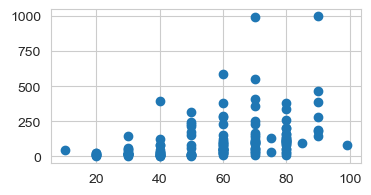

In [23]:
fig,ax = plt.subplots(figsize=(4,2))
plt.scatter(df_dum['karno'],df_dum['time'])

<Axes: >

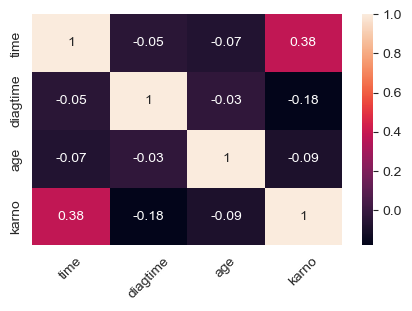

In [24]:
# Aquí se está aplicando Pearson a todas las de intervalo y razón
corrPearson_dum = df_dum[intervalo + razon].corr()  
fig,ax = plt.subplots(figsize=(5,3))
sns.heatmap(corrPearson_dum.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

### Interpretación de la correlación de Pearson

+ Correlación positiva no fuerte entre karno y time: karno y time crecen conjuntamente de forma lineal, aunque la linealidad es débil
+ Normalmente se consideran correlaciones fuertes por encima de 0.6, pero depende del problema de estudio. Pueden considerarse altas por encima de valores como 0.4 en algunos casos, o incluso menores.
+ El resto de las correlaciones son muy pequeñas

###  Cálculo de la correlación de Spearman

Utilice la correlación de rango de Spearman cuando tenga dos __variables de ranking (clasificadas)__ y desee ver si las dos variables covarían. 

Una variable clasificada es aquella que tiene un valor ordinal (es decir, 1°, 2°, 3°, etc.). Si bien es posible que no se conozca el valor exacto de la variable, sí lo es su lugar en relación con las otras variables.

In [25]:
df_dum.age.unique()

array([69, 64, 38, 63, 65, 49, 68, 43, 70, 81, 52, 48, 61, 42, 35, 56, 55,
       67, 46, 53, 66, 60, 62, 72, 50, 34, 47, 45, 41, 37, 54, 58, 51, 40,
       36, 71, 44, 59, 57, 39], dtype=int64)

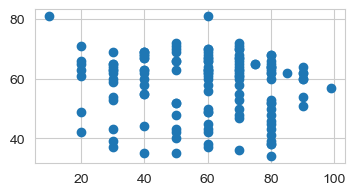

In [26]:
fig,ax = plt.subplots(figsize=(4,2))
plt.scatter(df_dum['karno'],df_dum['age'])

<Axes: >

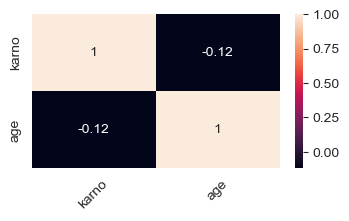

In [27]:
fig,ax = plt.subplots(figsize=(4,2))
corrSpearman = df_dum[ranked].corr(method='spearman')  
sns.heatmap(corrSpearman.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

### Interpretación

+ Correlación positiva no fuerte entre karno y time: karno y time crecen conjuntamente de forma lineal, aunque la linealidad es débil

## Ejercicio

Crear una nueva característica a partir de age discretizando esa variable en 4 binnings (puede usar los cuartiles)

Calcule el coeficiente de correlación de Spearman entre esta nueva característica y karno.

In [28]:
# Solución del ejercicio


###  Cálculo de la correlación de Kendall

Utilice la correlación de rango de Kendall cuando .

<Axes: >

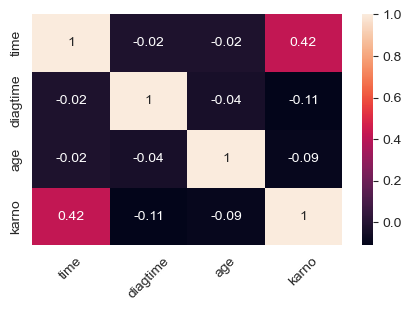

In [29]:
corrKendall = df_dum[intervalo + razon].corr(method='kendall')  

fig,ax = plt.subplots(figsize=(5,3))
sns.heatmap(corrKendall.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

### Interpretación
+ No existe fuerte correlación entre ningún par de variables ordinales candidatas a predictoras (karno, diagtime y age). Estamos considerando que son fuertes si son mayores que 0.6
+ Con time, que será nuestra variable dependiente en algunas preguntas de investigación, observamos que karno es con la que tiene mayor relación, sobre todo cuando usamos Spearman (crecen conjuntamente, aunque no necesariamente de forma lineal, pero sí monótonamente creciente en este caso por ser 0.57). Pearson mide relación lineal y es solo de 0.38

###  Cálculo de la correlación punto biserial entre dicotómica y continua

+ Observe que se obtienen los mismos resultados que con Pearson
+ El valor P es la probabilidad de que hubiera encontrado el resultado actual si el coeficiente de correlación fuera cero (hipótesis nula). Si esta probabilidad es inferior al 5% convencional (P<0,05), el coeficiente de correlación se denomina estadísticamente significativo.
+ La correlación biserial puntual se utiliza para medir la relación entre una variable binaria, x, y una variable continua, y. Como otro coeficientes de correlación, este varía entre -1 y +1
+ 0 implica ninguna correlación. 
+ stats.poinbiserialr() usa una prueba t con n-1 grados de libertad. 
+ La correlación biserial puntual es una medida útil del tamaño del efecto, es decir, la magnitud estadística de la diferencia de medias entre dos grupos. Se basa en la correlación momento-producto de Pearson.
Para más detalle ver https://onlinelibrary.wiley.com/doi/10.1002/9781118445112.stat06227
+ Esta función se puede calcular usando una fórmula abreviada pero produce el mismo resultado que "pearsonr()".
+ El cuadrado de esta correlación , es una medida del tamaño del efecto en términos de la proporción de variabilidad explicada por la relación entre las dos variables.

### Significancia y correlación

+ stats.pointbiserialr nos da como salida el estadístico (correlación pb) y el p valor que es la significancia de la prueba t
+ Si utilizamos un nivel de confianza del 95% y obtenemos que p < . 05, rechazamos la H0 y decimos que existe una correlación significativa (H1). En caso contrario, no podemos rechazar la hipótesis nula, y no podemos afirmar que la correlación difiera significativamente de 0.

__Significancia estadística__

En la práctica, al explorar un conjunto de datos para dependencias variables, los estudios de correlaciones y sus significancias son igualmente relevantes: __una gran correlación puede ser estadísticamente insignificante y viceversa, una pequeña correlación puede ser muy significativa__.

In [30]:
#help(stats.pointbiserialr)

In [31]:
# Observe los mismos resultados
print(stats.pointbiserialr(df_dum['trt_2'], df_dum['time']))
#print(stats.pointbiserialr(df_dum['trt_2'], df_dum['time'])[1])
print(stats.pearsonr(df_dum['trt_2'], df_dum['time']))

SignificanceResult(statistic=0.04153088372696949, pvalue=0.629905041271981)
PearsonRResult(statistic=0.04153088372696949, pvalue=0.629905041271981)


In [32]:
df_dum[['trt_2','time']].corr()

trt_2      time
trt_2  1.000000  0.041531
time   0.041531  1.000000

### Interpretación

Ho: los dos grupos de tratamiento son iguales en cuanto a la media del tiempo de muerte 

+ La hipótesis no se rechaza con un valor de 0.63

In [33]:
for i in nominales:
    for j in razon + intervalo:
        pb = stats.pointbiserialr(df_dum[i], df_dum[j])
        print(f'Correlación de punto biserial entre variables {i} - {j} y correlación de Pearson')
        print(pb)
        if pb[1] < 0.05: #se rechaza la hipótesis de grupos iguales
            f'Los grupos de {i} NO tienen iguales medias de {j}.'
            f'Rechazamos la H0 y decimos que Sí existe una correlación significativa (H1)'
        else:
            f'Los grupos de {i} tienen iguales medias de {j}'
            'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'
        print('----------')


Correlación de punto biserial entre variables trt_2 - time y correlación de Pearson
SignificanceResult(statistic=0.04153088372696949, pvalue=0.629905041271981)


'Los grupos de trt_2 tienen iguales medias de time'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables trt_2 - diagtime y correlación de Pearson
SignificanceResult(statistic=0.01157999232437354, pvalue=0.8931630374710257)


'Los grupos de trt_2 tienen iguales medias de diagtime'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables trt_2 - age y correlación de Pearson
SignificanceResult(statistic=0.07666118707057998, pvalue=0.3732587621291457)


'Los grupos de trt_2 tienen iguales medias de age'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables trt_2 - karno y correlación de Pearson
SignificanceResult(statistic=-0.03196367513609349, pvalue=0.7107924360444445)


'Los grupos de trt_2 tienen iguales medias de karno'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_large - time y correlación de Pearson
SignificanceResult(statistic=0.14015902562895477, pvalue=0.10235087488678858)


'Los grupos de celltype_large tienen iguales medias de time'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_large - diagtime y correlación de Pearson
SignificanceResult(statistic=-0.029312467228542284, pvalue=0.733839147011973)


'Los grupos de celltype_large tienen iguales medias de diagtime'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_large - age y correlación de Pearson
SignificanceResult(statistic=-0.09831929272531828, pvalue=0.25302808986188974)


'Los grupos de celltype_large tienen iguales medias de age'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_large - karno y correlación de Pearson
SignificanceResult(statistic=0.1595669135106879, pvalue=0.06252951530368661)


'Los grupos de celltype_large tienen iguales medias de karno'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_adeno - time y correlación de Pearson
SignificanceResult(statistic=-0.18122443442886182, pvalue=0.03406314740240539)


'Los grupos de celltype_adeno NO tienen iguales medias de time.'

'Rechazamos la H0 y decimos que Sí existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_adeno - diagtime y correlación de Pearson
SignificanceResult(statistic=-0.14732238282970908, pvalue=0.08580545081340987)


'Los grupos de celltype_adeno tienen iguales medias de diagtime'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_adeno - age y correlación de Pearson
SignificanceResult(statistic=-0.042413744176966084, pvalue=0.6226394619603006)


'Los grupos de celltype_adeno tienen iguales medias de age'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_adeno - karno y correlación de Pearson
SignificanceResult(statistic=-0.011370324900181444, pvalue=0.8950862635328207)


'Los grupos de celltype_adeno tienen iguales medias de karno'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_smallcell - time y correlación de Pearson
SignificanceResult(statistic=-0.2333432068070012, pvalue=0.0060662987350508235)


'Los grupos de celltype_smallcell NO tienen iguales medias de time.'

'Rechazamos la H0 y decimos que Sí existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_smallcell - diagtime y correlación de Pearson
SignificanceResult(statistic=0.03308059984451577, pvalue=0.7011594449101696)


'Los grupos de celltype_smallcell tienen iguales medias de diagtime'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_smallcell - age y correlación de Pearson
SignificanceResult(statistic=0.10966652883409439, pvalue=0.20206015824634732)


'Los grupos de celltype_smallcell tienen iguales medias de age'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_smallcell - karno y correlación de Pearson
SignificanceResult(statistic=-0.18492468867363607, pvalue=0.03051426426263791)


'Los grupos de celltype_smallcell NO tienen iguales medias de karno.'

'Rechazamos la H0 y decimos que Sí existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_squamous - time y correlación de Pearson
SignificanceResult(statistic=0.29271232382401896, pvalue=0.000518400946761141)


'Los grupos de celltype_squamous NO tienen iguales medias de time.'

'Rechazamos la H0 y decimos que Sí existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_squamous - diagtime y correlación de Pearson
SignificanceResult(statistic=0.12492207043404473, pvalue=0.1458127270449692)


'Los grupos de celltype_squamous tienen iguales medias de diagtime'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_squamous - age y correlación de Pearson
SignificanceResult(statistic=0.008397802987058365, pvalue=0.9224128355911908)


'Los grupos de celltype_squamous tienen iguales medias de age'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables celltype_squamous - karno y correlación de Pearson
SignificanceResult(statistic=0.06712030421372178, pvalue=0.43580064138514996)


'Los grupos de celltype_squamous tienen iguales medias de karno'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables status_1 - time y correlación de Pearson
SignificanceResult(statistic=0.011926348317782963, pvalue=0.8899873674104997)


'Los grupos de status_1 tienen iguales medias de time'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables status_1 - diagtime y correlación de Pearson
SignificanceResult(statistic=0.0500555939180863, pvalue=0.5613201347441766)


'Los grupos de status_1 tienen iguales medias de diagtime'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables status_1 - age y correlación de Pearson
SignificanceResult(statistic=0.07225834514221421, pvalue=0.40140732670939683)


'Los grupos de status_1 tienen iguales medias de age'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables status_1 - karno y correlación de Pearson
SignificanceResult(statistic=-0.16508678676624167, pvalue=0.05387557312455279)


'Los grupos de status_1 tienen iguales medias de karno'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables prior_10 - time y correlación de Pearson
SignificanceResult(statistic=0.09381790156356276, pvalue=0.27551235610055996)


'Los grupos de prior_10 tienen iguales medias de time'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables prior_10 - diagtime y correlación de Pearson
SignificanceResult(statistic=0.4176238829382141, pvalue=3.827268429334913e-07)


'Los grupos de prior_10 NO tienen iguales medias de diagtime.'

'Rechazamos la H0 y decimos que Sí existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables prior_10 - age y correlación de Pearson
SignificanceResult(statistic=-0.09975457540105336, pvalue=0.24613246780585873)


'Los grupos de prior_10 tienen iguales medias de age'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------
Correlación de punto biserial entre variables prior_10 - karno y correlación de Pearson
SignificanceResult(statistic=-0.05851412191132575, pvalue=0.497012965245565)


'Los grupos de prior_10 tienen iguales medias de karno'

'Aceptamos la H0 y decimos que NO existe una correlación significativa (H1)'

----------


### Interpretación

La interpretación de la prueba de hipótesis se hizo para cada caso como salida del código.

### Coeficiente de correlación phik

La documentación de la biblioteca phik de Python la encuentra en https://arxiv.org/pdf/1811.11440.pdf

https://stats.stackexchange.com/questions/497742/making-sense-of-the-phi-k-correlation-coefficient

El cálculo de φK contiene una corrección para las fluctuaciones estadísticas: para cualquier valor de χ2 por debajo del umbral de ruido específico de la muestra (χ2ped: pedestal de ruido), lo que indica que no se puede determinar una correlación significativa, φK se establece en 0 por construcción. Es por eso que a continuación se verán valores de 0 en la matriz de correlación.

Como se dijo anteriormente, es necesario tanto el análisis de correlación como de significancia.

In [34]:
phik.__version__  # ya existe versión 0.12.3

'0.12.3'

In [35]:
#df_dum.phik_matrix?

In [36]:
#df_dum

## Matriz de correlación phik



In [37]:
# get the phi_k correlation matrix between all variables
# Por defecto usa 10 bines
pm = df_dum.phik_matrix(interval_cols = ['time', 'karno', 'diagtime', 'age'] )

<Axes: >

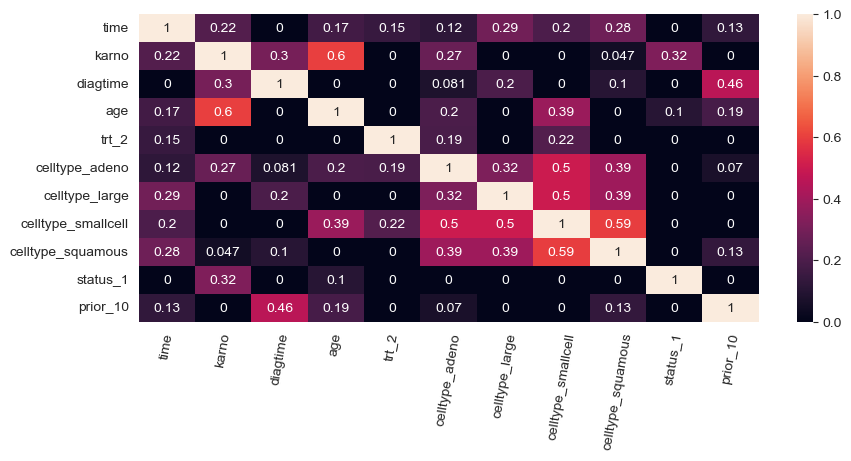

In [38]:
fig,ax = plt.subplots(figsize=(10,4))
sns.heatmap(pm.round(3),annot=True)
plt.tick_params(axis='x', rotation=80)
plt.show()

### Significancia de la correlación entre todas las combinaciones de variables

La matriz de significancia nos da los valores z. El coeficiente phik solo se evaluará si z > 0.5 Ver https://stats.stackexchange.com/questions/497742/making-sense-of-the-phi-k-correlation-coefficient

+ significance_matrix() calcula la importancia de la correlación de todas las combinaciones de variables en el marco de datos
+ La prueba estadística que usa por defecto es log-likelihood
+ Calcula la significancia de la correlación entre todas las combinaciones de variables

__Niveles de significancia__ El nivel de significancia para una prueba de hipótesis determinada es un valor para el cual un valor P menor o igual se considera estadísticamente significativo. Los valores típicos son 0,1, 0,05 y 0,01. Estos valores corresponden a la probabilidad de observar por casualidad un valor tan extremo.
Eel nivel de significancia, denotado por alfa, es la probabilidad de que el estudio rechace la hipótesis nula, dado que la hipótesis nula es verdadera; y el valor p de un resultado, p, es la probabilidad de obtener un resultado al menos igual de extremo, dado que la hipótesis nula es verdadera.] El resultado es estadísticamente significativo, según los estándares del estudio, cuando p≤alfa. El nivel de significancia de un estudio se elige antes de la recopilación de datos y normalmente se establece en 5% o mucho menos, según el campo de estudio.

In [39]:
df_dum.significance_matrix?

In [40]:

sigm = df_dum.significance_matrix(interval_cols= ['time', 'karno', 'diagtime', 'age'])

In [41]:
int(sigm.max().max())

18

<Axes: >

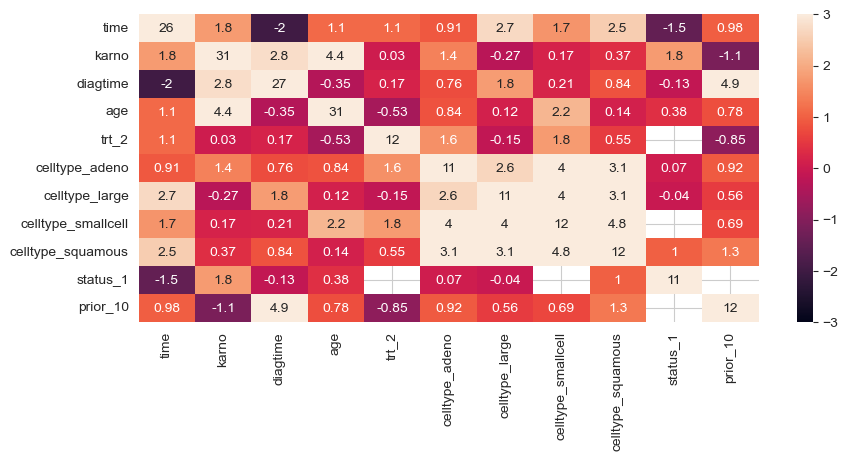

In [42]:
#sns.heatmap?
# Estos resultados se obtienen con 1000 simulaciones. puede cambiarse ese argumento
sigmp = df_dum.significance_matrix(interval_cols= ['time', 'karno', 'diagtime', 'age'],lambda_='pearson')
fig,ax = plt.subplots(figsize=(10,4))

# La escala de colores indica el nivel de significancia y se satura a ±3 desviaciones estándar.
vmin = -3
vmax = 3

#vmax = int(sigmp.max().max())
sns.heatmap(sigmp.round(2),annot=True,vmin=vmin,vmax=vmax)
#sns.heatmap(sigm.round(3),annot=True, yticklabels=gk[1])
plt.tick_params(axis='x', rotation=90)
plt.show()

### Interpretación 

+ karno y age tienen una alta correlación de 0.6 y su significancia es alta (4.3)
+ karno y time tienen una baja correlación y baja significancia; su significancia es menor que 2sigma (1.6)
+ celltype_squamous tiene muy baja correlación con tiempo (0.28), pero es estadísticamente muy significativa (2.5)
+ Las que están en blanco es porque el resultado es infinito

<Axes: >

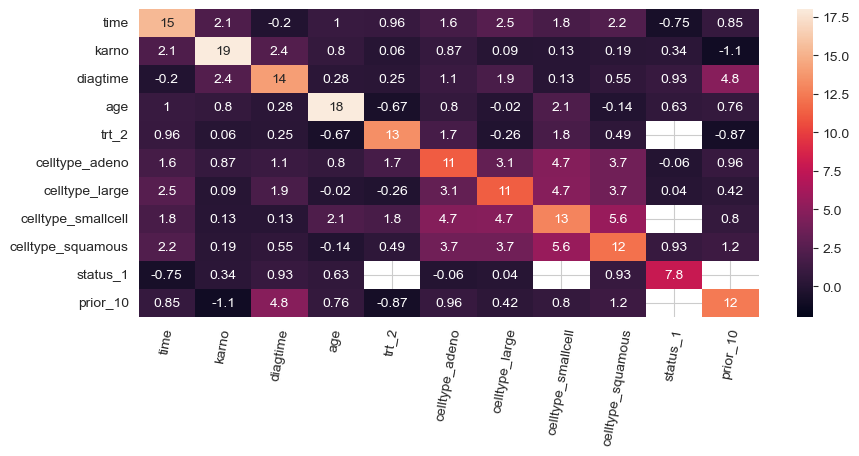

In [43]:
fig,ax = plt.subplots(figsize=(10,4))

vmin = -2
vmax = int(sigm.max().max())
sns.heatmap(sigm.round(2),annot=True,vmin=vmin,vmax=vmax)
#sns.heatmap(sigm.round(3),annot=True, yticklabels=gk[1])
plt.tick_params(axis='x', rotation=80)
plt.show()

### Interpretación de la significancia

+ Como se puede observar, la significancia en muchos casos es menor a 0.5 y en esos casos el coeficiente de correlación en la matriz de correlación aparece como 0; se fija en 0. 
+ Una de las razones pudiera ser que la muestra es pequeña.

## Coeficientes de correlación global

Además de la información de pares de variables disponible de la matriz de correlación phik, también es interesante evaluar el __coeficiente de correlación global por variable__, gk. Estrictamente hablando, gk solo se define para variables de intervalo (recuerde que las de razón también son de intervalo), ya que requiere una matriz de covarianza V . 

+ Establecemos las varianzas de todos los tipos de variables en uno (de todos modos, indefinido para las variables categóricas) y usamos V = C. 

+ __Las correlaciones globales brindan una estimación sostenible de qué tan bien se puede modelar cada variable en términos de todas las demás variables, independientemente del tipo de variable__.

### Interpretación de gk

+ gk nos indica cuán bien puede ser modelada una variable en función de las otras. Aquí una variable dependiente puede ser time y su gk es 0.54, que es bajo. Otra dependiente puede ser status_1 con coef. global de 0.52 que es bajo.
+ Si karno y edad fueran dependientes, entonces vemos que tienen un coef. alto de 0.92

In [44]:
gk = df_dum.global_phik(interval_cols= ['time', 'karno', 'diagtime', 'age'])
gk

(array([[0.53654749],
        [0.92096152],
        [0.79145449],
        [0.92137879],
        [0.46871007],
        [0.70213164],
        [0.65345812],
        [0.92311045],
        [0.80959221],
        [0.52140137],
        [0.79659835]]),
 array(['time', 'karno', 'diagtime', 'age', 'trt_2', 'celltype_adeno',
        'celltype_large', 'celltype_smallcell', 'celltype_squamous',
        'status_1', 'prior_10'], dtype=object))

<Axes: >

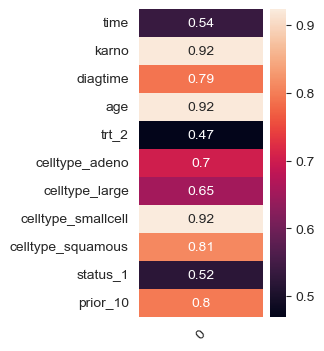

In [45]:
# Por defecto gk se calcula con 10 bines
gk = df_dum.global_phik(interval_cols= ['time', 'karno', 'diagtime', 'age'])
fig,ax = plt.subplots(figsize=(2,4))
sns.heatmap(gk[0].round(3),annot=True,
           yticklabels=gk[1])
plt.tick_params(axis='x', rotation=45)
plt.show()

In [46]:
pd.DataFrame.hist2d?
#Give binned 2d DataFrame of two columns of input DataFrame

In [47]:
# contingency table of two columns
cols = ['time','celltype_smallcell']
ct = df_dum[cols].hist2d(interval_cols=['time'],bins=15) # 10 bins por defecto, pero no uniforme
ct

celltype_smallcell     0     1
time                          
1                   34.0  32.0
2                   23.0  10.0
3                   11.0   3.0
4                    8.0   0.0
5                    3.0   1.0
6                    4.0   2.0
7                    1.0   0.0
8                    1.0   0.0
9                    2.0   0.0
15                   2.0   0.0

<Axes: xlabel='celltype_smallcell', ylabel='time'>

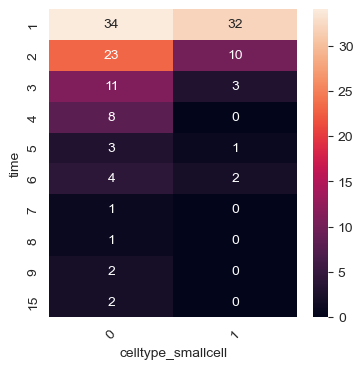

In [48]:
fig,ax = plt.subplots(figsize=(4,4))
sns.heatmap(ct.round(3),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

In [49]:
# contingency table of two columns
cols = ['time','celltype_smallcell']
ct = df_dum[cols].hist2d(interval_cols=['time'],quantile=4,bins=4) # 10 bins por defecto, pero no uniforme
ct

celltype_smallcell   0   1
time                      
1                   19  19
2                   18  14
3                   23  10
4                   29   5

<Axes: xlabel='celltype_smallcell', ylabel='time'>

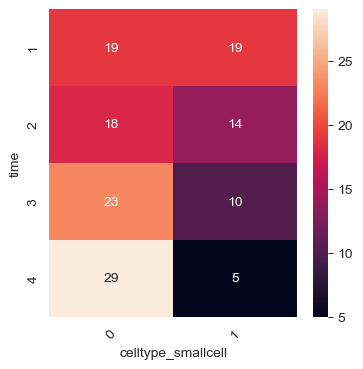

In [50]:
fig,ax = plt.subplots(figsize=(4,4))
sns.heatmap(ct.round(3),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

## Análisis de valores atípicos en la matriz de significancia

__phik.outlier_significance_matrix()__ Calcula la matriz de significancia de excesos o déficits y regresa una matriz de valores atípico de significancia

__phik.outlier_significance_matrices()__ Calcula la matriz de significancia de excesos o déficits para todas las combinaciones posibles de variables, o para aquellas combinaciones especificadas mediante combinaciones.

In [51]:
phik.outlier_significance_matrices?

In [52]:
# normalized residuals of contingency test applied to cols
df_dum[cols].outlier_significance_matrix(interval_cols=['time'])


celltype_smallcell         0         1
1.0_100.8          -2.925696  3.340191
100.8_200.6         1.261351 -1.490295
200.6_300.4         1.750710 -2.050688
300.4_400.2         0.049095 -0.474896
400.2_500.0        -0.336848 -1.115970
500.0_599.8        -0.336848 -1.115970
899.2_999.0        -0.336848 -1.115970

In [53]:
# show the normalized residuals of each variable-pair
df_dum.outlier_significance_matrices(interval_cols=['time'])

C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\phik\outliers.py:200: RuntimeWarning: invalid value encountered in double_scalars
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))
C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\phik\outliers.py:200: RuntimeWarning: invalid value encountered in double_scalars
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))


{'time:karno': karno              10        20        30        40        50  ...        75  \
 1.0_100.8   -0.691720  1.394645  2.599589  2.260668 -0.541767  ... -0.715273   
 100.8_200.6 -0.504404 -1.506481 -1.457460 -1.685914 -0.714571  ...  0.687147   
 200.6_300.4 -0.203994 -0.716083 -1.186405 -1.306419  1.610190  ... -0.300650   
 300.4_400.2 -0.134546 -0.504084 -0.863129  0.197715  0.325129  ... -0.201951   
 400.2_500.0 -0.045553 -0.201951 -0.372365 -0.419238 -0.372365  ... -0.072436   
 500.0_599.8 -0.045553 -0.201951 -0.372365 -0.419238 -0.372365  ... -0.072436   
 899.2_999.0 -0.045553 -0.201951 -0.372365 -0.419238 -0.372365  ... -0.072436   
 
 karno              80        85        90        99  
 1.0_100.8   -3.081693 -0.691720 -3.551966 -0.691720  
 100.8_200.6  3.547364 -0.504404  1.213539 -0.504404  
 200.6_300.4  0.021010 -0.203994  0.537352 -0.203994  
 300.4_400.2  0.662542 -0.134546  0.885392 -0.134546  
 400.2_500.0 -0.600771 -0.045553  1.641710 -0.045553  
 500.0

In [54]:
phik.report.correlation_report?

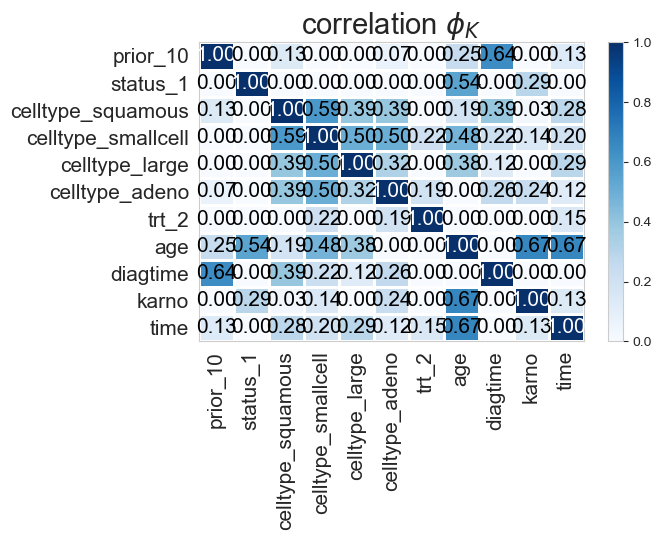

C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\phik\phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


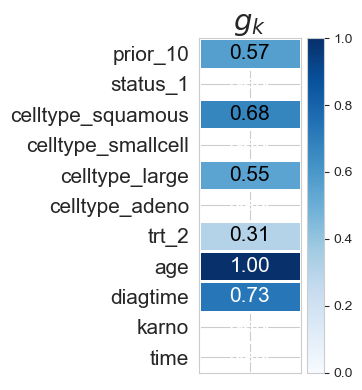

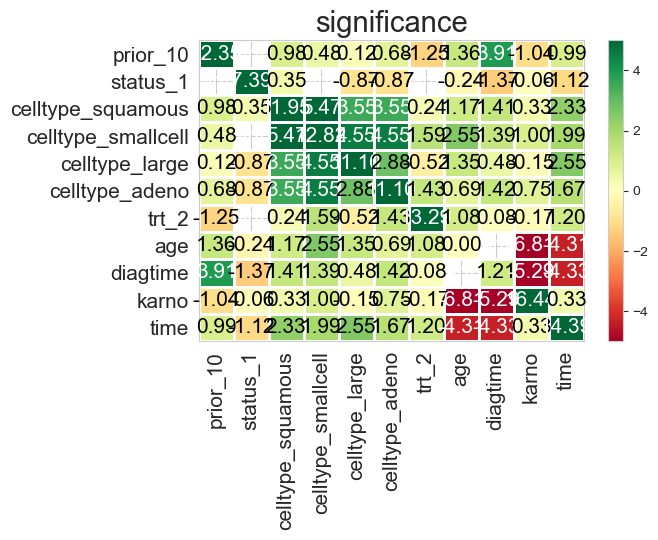

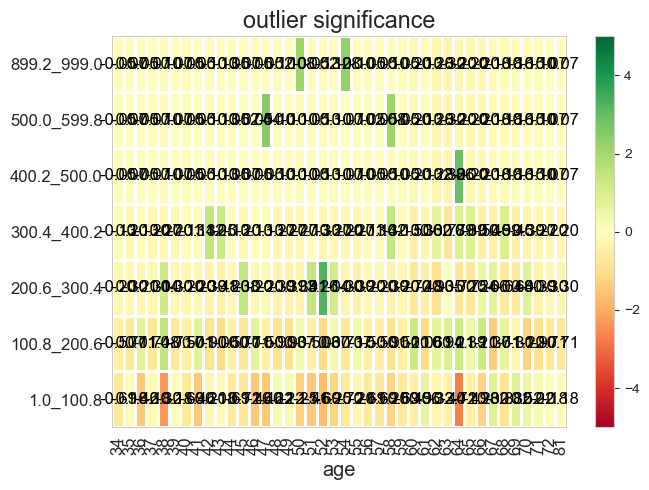

C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\phik\outliers.py:200: RuntimeWarning: invalid value encountered in double_scalars
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))


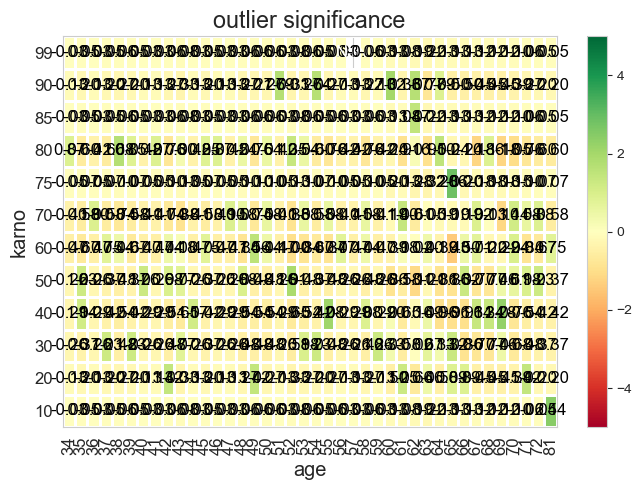

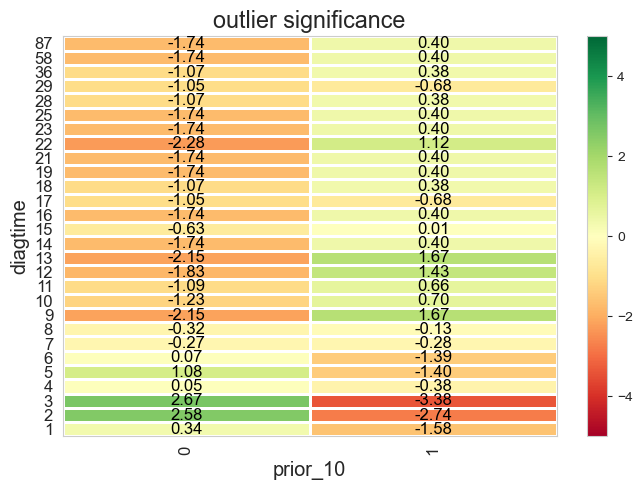

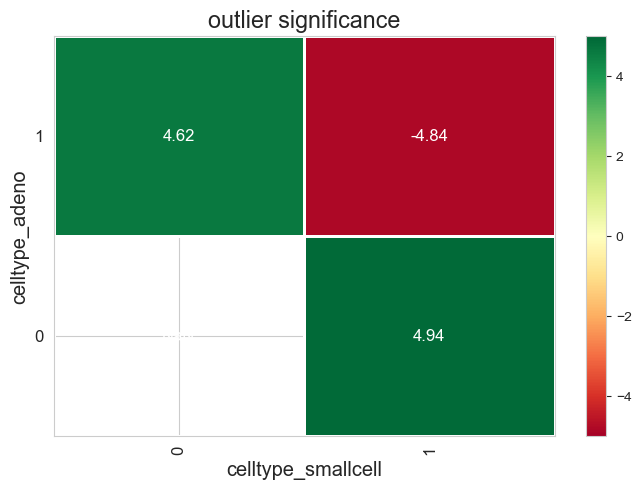

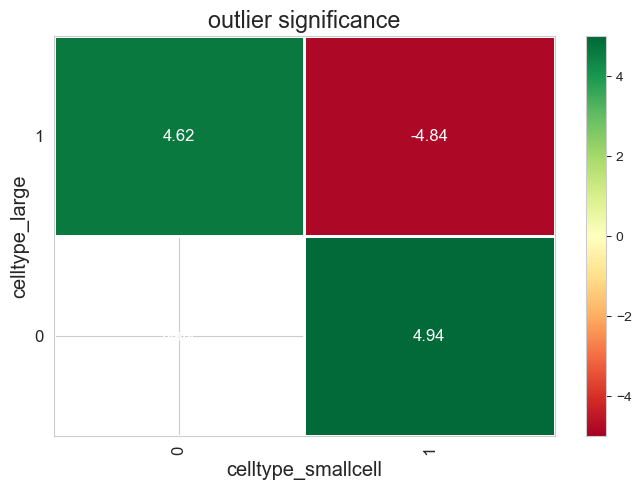

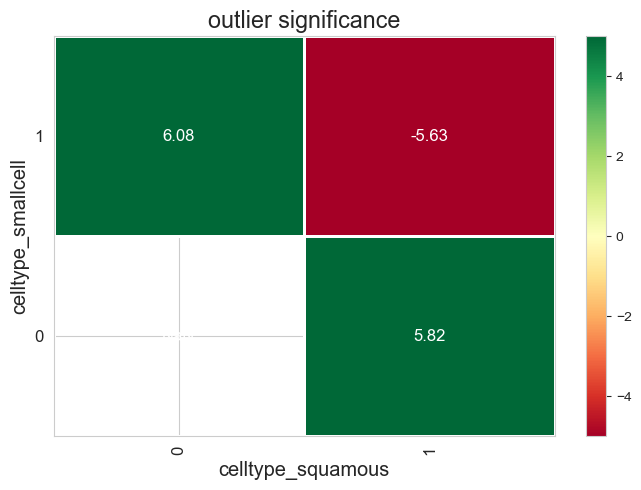

(                        time     karno  diagtime       age     trt_2  ...  \
 time                1.000000  0.133551  0.000000  0.670152  0.147069  ...   
 karno               0.133551  1.000000  0.000000  0.670918  0.000000  ...   
 diagtime            0.000000  0.000000  1.000000  0.000000  0.000000  ...   
 age                 0.670152  0.670918  0.000000  1.000000  0.000000  ...   
 trt_2               0.147069  0.000000  0.000000  0.000000  1.000000  ...   
 celltype_adeno      0.122001  0.236626  0.260699  0.000000  0.193937  ...   
 celltype_large      0.290773  0.000000  0.119624  0.376335  0.000000  ...   
 celltype_smallcell  0.199515  0.143054  0.219533  0.475904  0.217005  ...   
 celltype_squamous   0.281669  0.033906  0.393902  0.189418  0.000000  ...   
 status_1            0.000000  0.288603  0.000000  0.544934  0.000000  ...   
 prior_10            0.132342  0.000000  0.643925  0.245417  0.000000  ...   
 
                     celltype_large  celltype_smallcell  cellt

In [55]:
# generate a phik correlation report and save as test.pdf
report.correlation_report(df_dum,interval_cols=['time'],
                          pdf_file_name='test_veteranos_phik.pdf')

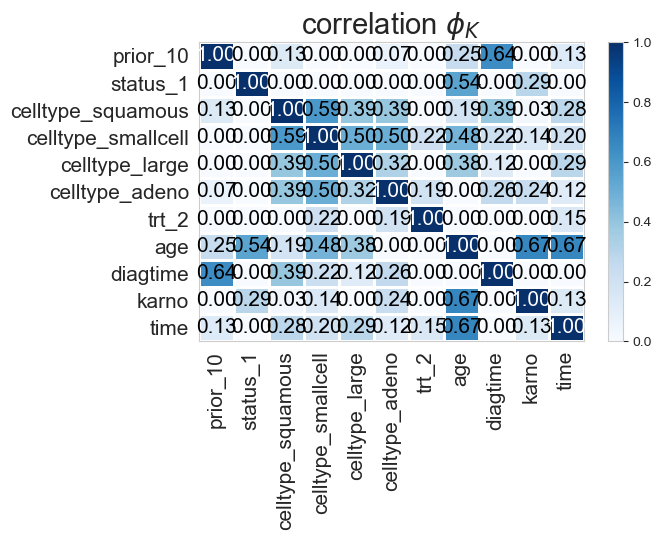

C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\phik\phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


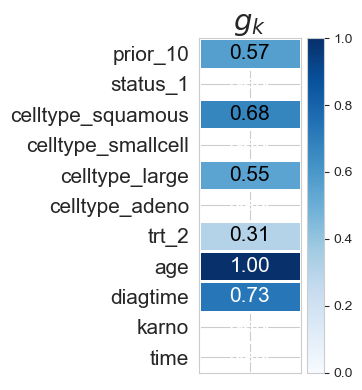

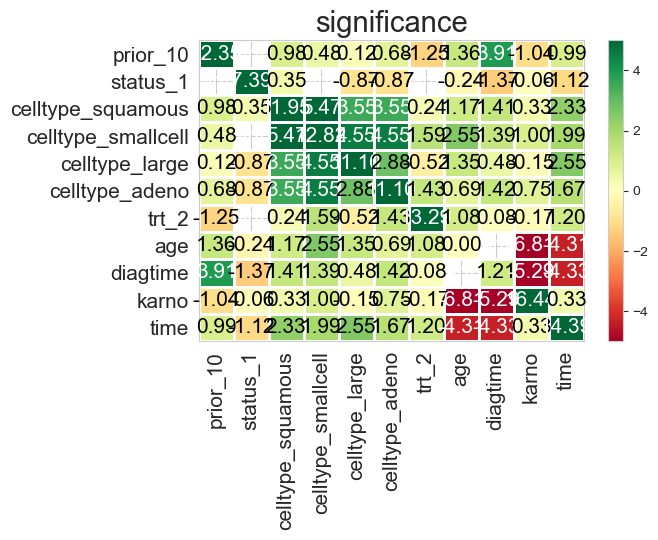

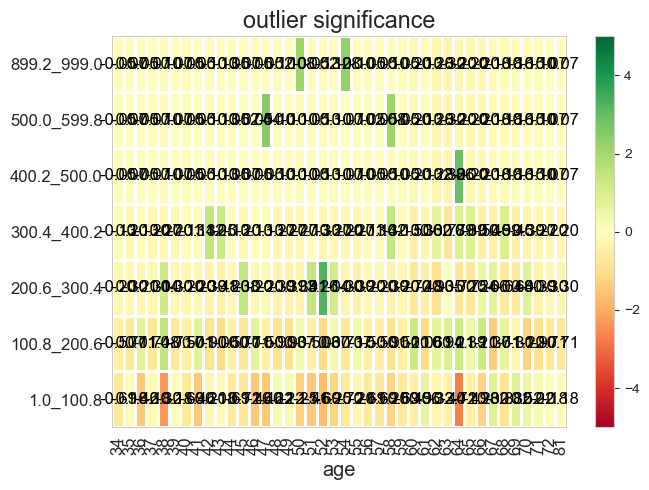

C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\phik\outliers.py:200: RuntimeWarning: invalid value encountered in double_scalars
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))


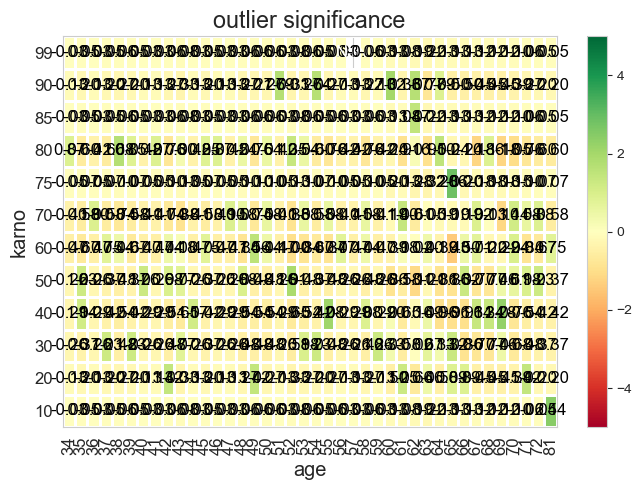

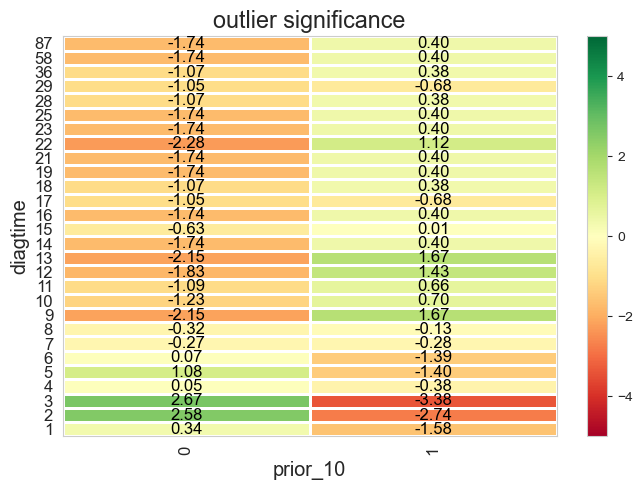

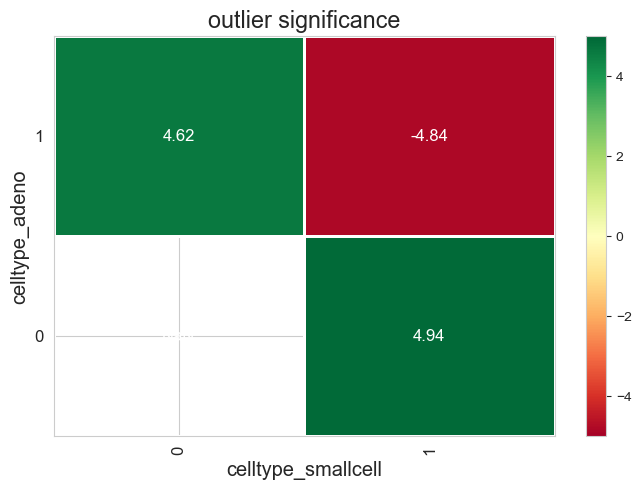

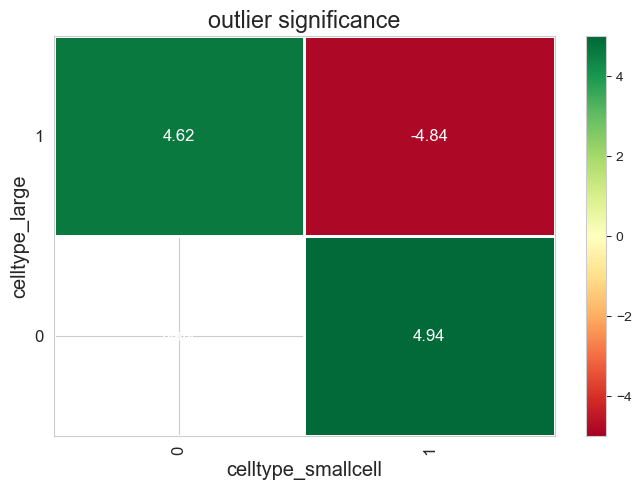

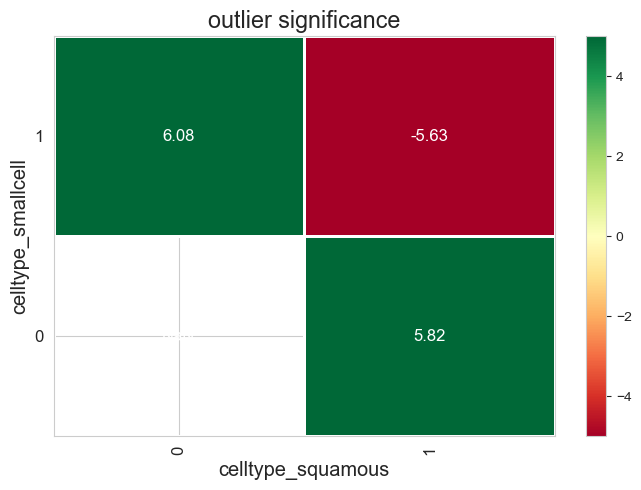

(                        time     karno  diagtime       age     trt_2  ...  \
 time                1.000000  0.133551  0.000000  0.670152  0.147069  ...   
 karno               0.133551  1.000000  0.000000  0.670918  0.000000  ...   
 diagtime            0.000000  0.000000  1.000000  0.000000  0.000000  ...   
 age                 0.670152  0.670918  0.000000  1.000000  0.000000  ...   
 trt_2               0.147069  0.000000  0.000000  0.000000  1.000000  ...   
 celltype_adeno      0.122001  0.236626  0.260699  0.000000  0.193937  ...   
 celltype_large      0.290773  0.000000  0.119624  0.376335  0.000000  ...   
 celltype_smallcell  0.199515  0.143054  0.219533  0.475904  0.217005  ...   
 celltype_squamous   0.281669  0.033906  0.393902  0.189418  0.000000  ...   
 status_1            0.000000  0.288603  0.000000  0.544934  0.000000  ...   
 prior_10            0.132342  0.000000  0.643925  0.245417  0.000000  ...   
 
                     celltype_large  celltype_smallcell  cellt

In [56]:
# generate a phik correlation report and save as test.pdf
report.correlation_report(df_dum,interval_cols=['time'],
                          pdf_file_name='test_veteranos_phik.pdf')

### Revisar el pdf generado

+ Note los problemas de tamaño de las gráficas y sus elementos 

### Análisis bivariado entre categóricas

Veremos el uso de las __tablas de contingencia__ y las gráficas empleadas para su visualización

Una __tabla de contingencia__ es un tipo de tabla que resume la relación entre dos variables categóricas.

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]

Calcula una tabulación cruzada de dos o más grupos (en R se llaman factores). Por defecto su salida es una tabla de frecuencias, a menos que se le pase un arreglo de valores y una función de agregación.

Los valores se pueden mostrar normalizados (proporciones)

In [57]:
# Crear todas las combinaciones entre categóricas no dummies

from itertools import permutations
perm_sin_rep = [i for i in permutations(['trt','celltype','prior_10','status_1'],r =2)]

output = set(map(lambda x: tuple(sorted(x)),perm_sin_rep))
output

{('celltype', 'prior_10'),
 ('celltype', 'status_1'),
 ('celltype', 'trt'),
 ('prior_10', 'status_1'),
 ('prior_10', 'trt'),
 ('status_1', 'trt')}

In [58]:
pd.crosstab(index=df['celltype'], columns=df['prior_10'])

prior_10    0   1
celltype         
adeno      22   5
large      17  10
smallcell  37  11
squamous   21  14

### Tablas de contingencia para todas las combinaciones

+ Podemos usar el argumento margins=True para agregar los totales de margen a la tabla de contingencia
+ Primero se mostrarán con los conteos y después normalizados (proporciones)

In [59]:
for i in output:
    print(pd.crosstab(index=df[i[0]], columns=df[i[1]], margins=True))
    print('-------------------------')
    

trt        1   2  All
status_1             
0          5   4    9
1         64  64  128
All       69  68  137
-------------------------
status_1   0    1  All
celltype              
adeno      1   26   27
large      1   26   27
smallcell  3   45   48
squamous   4   31   35
All        9  128  137
-------------------------
trt         1   2  All
celltype              
adeno       9  18   27
large      15  12   27
smallcell  30  18   48
squamous   15  20   35
All        69  68  137
-------------------------
status_1  0    1  All
prior_10             
0         6   91   97
1         3   37   40
All       9  128  137
-------------------------
trt        1   2  All
prior_10             
0         48  49   97
1         21  19   40
All       69  68  137
-------------------------
prior_10    0   1  All
celltype              
adeno      22   5   27
large      17  10   27
smallcell  37  11   48
squamous   21  14   35
All        97  40  137
-------------------------


In [60]:
# Se muestra con porcentajes y dos lugares decimales
for i in output:
    print(pd.crosstab(index=df[i[0]], columns=df[i[1]], margins=True, normalize=True).round(4)*100)  
    print('-------------------------')
    

trt           1      2     All
status_1                      
0          3.65   2.92    6.57
1         46.72  46.72   93.43
All       50.36  49.64  100.00
-------------------------
status_1      0      1     All
celltype                      
adeno      0.73  18.98   19.71
large      0.73  18.98   19.71
smallcell  2.19  32.85   35.04
squamous   2.92  22.63   25.55
All        6.57  93.43  100.00
-------------------------
trt            1      2     All
celltype                       
adeno       6.57  13.14   19.71
large      10.95   8.76   19.71
smallcell  21.90  13.14   35.04
squamous   10.95  14.60   25.55
All        50.36  49.64  100.00
-------------------------
status_1     0      1    All
prior_10                    
0         4.38  66.42   70.8
1         2.19  27.01   29.2
All       6.57  93.43  100.0
-------------------------
trt           1      2    All
prior_10                     
0         35.04  35.77   70.8
1         15.33  13.87   29.2
All       50.36  49.64  100.0
-----

### Ejercicio: visualizar resultados de las tablas de contingencia

Ver https://seaborn.pydata.org/tutorial/categorical.html



In [61]:
#sns.countplot?

<Axes: xlabel='status_1', ylabel='count'>

<Axes: xlabel='celltype', ylabel='count'>

<Axes: xlabel='celltype', ylabel='count'>

<Axes: xlabel='prior_10', ylabel='count'>

<Axes: xlabel='prior_10', ylabel='count'>

<Axes: xlabel='celltype', ylabel='count'>

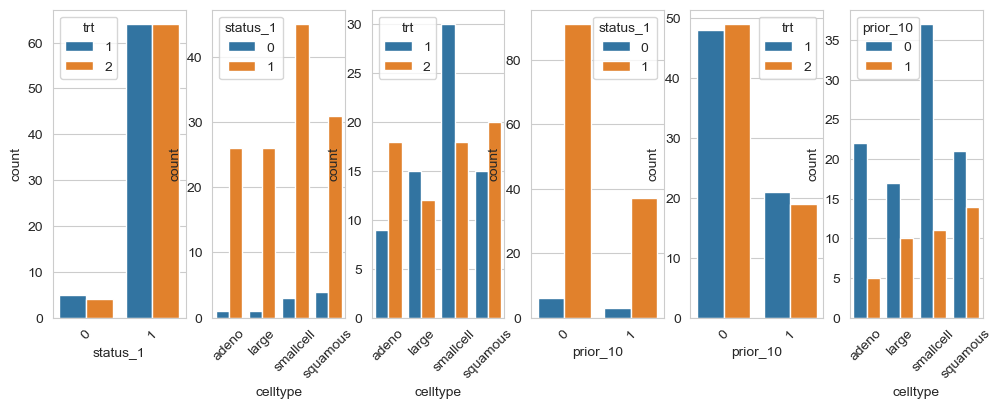

In [62]:
fig,ax = plt.subplots(1,len(output),figsize=(12,4))

for i,v in enumerate(output):
    ax[i].tick_params(axis='x', rotation=45)
    sns.countplot(data=df,x=df[v[0]],hue=df[v[1]],ax=ax[i])

## Agregar interpretación de cada diagrama

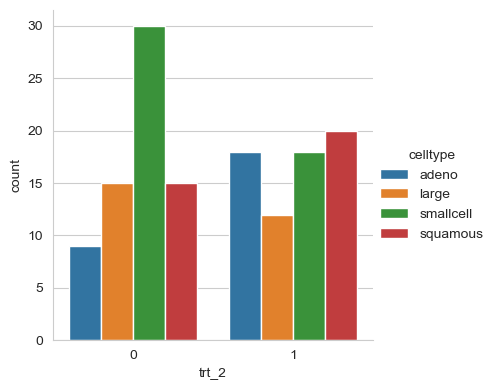

In [63]:
# Alternativa para conteo entre celltype y trt
sns.catplot(data=df, x='trt_2', hue="celltype", kind="count",height=4,aspect=1)

### Tablas dinámicas: Pivot table con pandas
#### Ejemplos de análisis multivariados entre 2 o 3 categóricas
Ver otros ejemplos en https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

Crea una tabla dinámica al estilo de una hoja de cálculo como DataFrame.

Los niveles en la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame de resultado.

Las combinaciones para las tablas dinámicas dependen de las preguntas de investigación

Ejemplo: ¿Está balanceada la cantidad de pacientes que mueren (status =1) por tipo de célula y tratamiento?

In [64]:
# Crear combinaciones para las tablas dinámicas

In [65]:
table = pd.pivot_table(df, values='status_1',  index=['trt'],columns=['celltype'],
                       aggfunc=np.sum,margins=True)
table

celltype  adeno  large  smallcell  squamous  All
trt                                             
1             9     14         28        13   64
2            17     12         17        18   64
All          26     26         45        31  128

In [66]:
#sns.catplot?

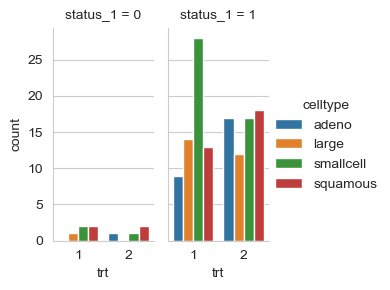

In [67]:
# La tabla anterior (sin los márgenes) se corresponde con la gráfica de la derecha
sns.catplot(data=df, x='trt', col='status_1',hue="celltype", kind="count",height=3,aspect=0.5)

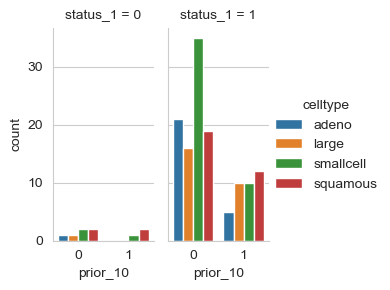

In [68]:
# La tabla anterior (sin los márgenes) se corresponde con la gráfica de la derecha
sns.catplot(data=df, x='prior_10', col='status_1',hue="celltype", kind="count",height=3,aspect=0.5)

### Diagrama de puntos de dos categóricas y de tres categóricas

Un gráfico de puntos representa una estimación de la tendencia central de una variable numérica por la posición del punto y proporciona alguna indicación de la incertidumbre en torno a esa estimación utilizando barras de error.

Los gráficos de puntos pueden ser más útiles que los gráficos de barras para centrar las comparaciones entre diferentes niveles de una o más variables categóricas. Son particularmente hábiles para mostrar interacciones: cómo cambia la relación entre los niveles de una variable categórica a través de los niveles de una segunda variable categórica. Las líneas que unen cada punto del mismo nivel de tonalidad permiten juzgar las interacciones por diferencias de pendiente, lo que es más fácil para los ojos que comparar las alturas de varios grupos de puntos o barras.

__Para conjuntos de datos en los que 0 no es un valor significativo__, un __gráfico de puntos__ le permitirá centrarse en las __diferencias entre los niveles de una o más variables categóricas__. 

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   trt                 137 non-null    category
 1   prior               137 non-null    category
 2   celltype            137 non-null    category
 3   time                137 non-null    int64   
 4   karno               137 non-null    int64   
 5   diagtime            137 non-null    int64   
 6   age                 137 non-null    int64   
 7   trt_1               137 non-null    uint8   
 8   trt_2               137 non-null    uint8   
 9   celltype_adeno      137 non-null    uint8   
 10  celltype_large      137 non-null    uint8   
 11  celltype_smallcell  137 non-null    uint8   
 12  celltype_squamous   137 non-null    uint8   
 13  status_0            137 non-null    uint8   
 14  status_1            137 non-null    uint8   
 15  prior_0             137 non-null    uint

In [70]:
df.head()

trt prior  celltype  time  karno  ...  status_0  status_1  prior_0  \
0   1     0  squamous    72     60  ...         0         1        1   
1   1    10  squamous   411     70  ...         0         1        0   
2   1     0  squamous   228     60  ...         0         1        1   
3   1    10  squamous   126     60  ...         0         1        0   
4   1    10  squamous   118     70  ...         0         1        0   

   prior_10  log_time  
0         0  1.857332  
1         1  2.613842  
2         0  2.357935  
3         1  2.100371  
4         1  2.071882  

[5 rows x 18 columns]

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='celltype', ylabel='trt_2'>

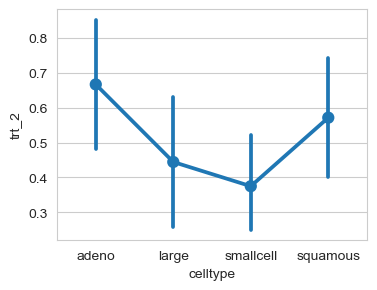

In [71]:
plt.figure(figsize=(4,3))

sns.pointplot(data=df, x="celltype", y="trt_2",dodge=True) # dodge evita la superposición al graficar

## 2 gráficas bivariadas con 3 variables involucradas

x es categórica; y es discreta de razón y se usó prior_10 para diferenciar los dos grupos en el mismos diagrama

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='celltype', ylabel='karno'>

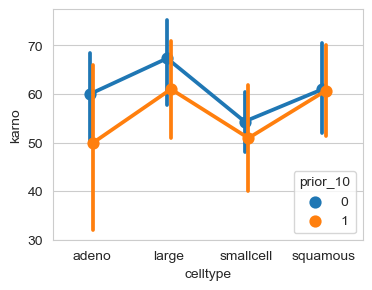

In [72]:
plt.figure(figsize=(4,3))

sns.pointplot(data=df, x="celltype", y="karno",hue='prior_10',dodge=True) # dodge evita la superposición al graficar

### Análisis bivariado entre categóricas y numéricas

+ Usaremos primero pivot table y visualizaciones
+ En otro notebook veremos Análisis de Varianza (ANOVA)

### Otro diagrama de puntos de dos categóricas y una de razón


<Figure size 400x300 with 0 Axes>

<Axes: xlabel='celltype', ylabel='karno'>

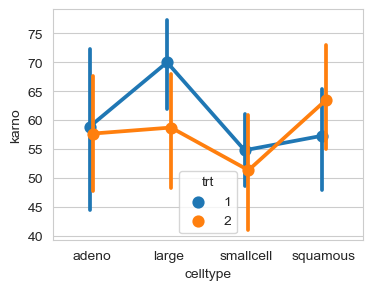

In [73]:
plt.figure(figsize=(4,3))

sns.pointplot(data=df, x="celltype", y="karno",hue='trt',dodge=True) # dodge evita la superposición al graficar

### Interpretación

+ La puntuación de karno es, como promedio, menor para los del tratamiento 2 que para los del tratamiento 1, excepto para las células de tipo squamous
+ La mayor diferencia se encuentra en los pacientes con células de tipo large, donde la puntuación karno es mucho mayor para los de tratamiento 1. Por el contrario, en pacientes con células tipo squamous, el karno es mucho mayor, como promedio con el tratamiento 2.
+ Se grafica la media del karno para cada tipo de célula, observando que la media mayor es del tipo large y la menor es la de smallcell 
+ Los que tienen cáncer de célula pequeña tienen una menor calidad de vida diaria como promedio.

In [74]:
ik = pd.qcut(df['karno'], 4)
table4 = df.pivot_table(values='time', index=['trt',ik])
table4

time
trt karno                    
1   (9.999, 40.0]   54.611111
    (40.0, 60.0]   129.545455
    (60.0, 75.0]   166.181818
    (75.0, 99.0]   126.888889
2   (9.999, 40.0]   26.600000
    (40.0, 60.0]    98.052632
    (60.0, 75.0]   184.000000
    (75.0, 99.0]   249.800000

In [75]:
df['karno_bin'] = ik # categórica ordinal

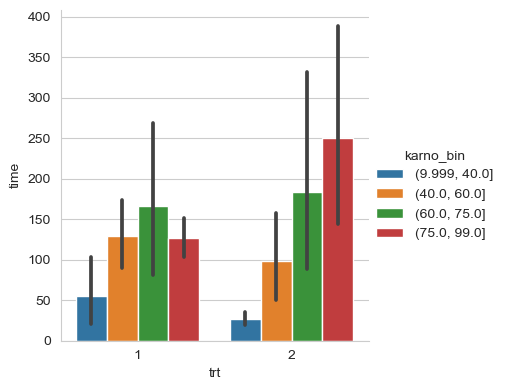

In [76]:
# Muestra la tabla anterior, adicionando las barras de dispersión
sns.catplot(data=df, x='trt',y='time', hue='karno_bin', kind="bar",height=4,aspect=1)

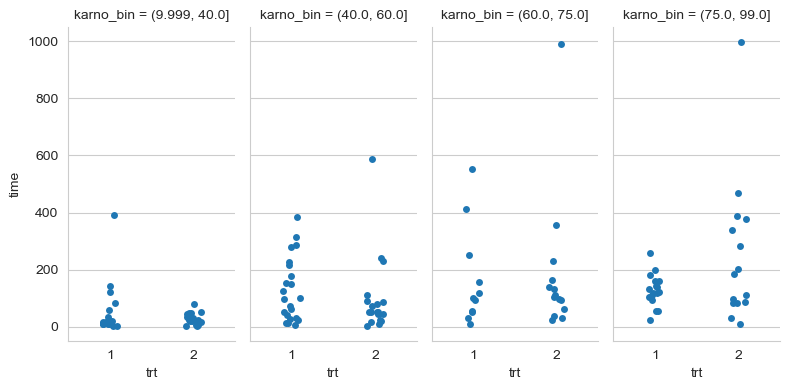

In [77]:
sns.catplot(data=df, x='trt',y='time', col='karno_bin',height=4,aspect=0.5) # el tipo es stripplot

In [78]:
edad = pd.qcut(df['age'], 4)
df.pivot_table('time', ['trt',edad])

time
trt age                       
1   (33.999, 51.0]  145.684211
    (51.0, 62.0]     85.277778
    (62.0, 66.0]    135.555556
    (66.0, 81.0]     85.857143
2   (33.999, 51.0]  116.312500
    (51.0, 62.0]    182.047619
    (62.0, 66.0]    121.400000
    (66.0, 81.0]     75.812500

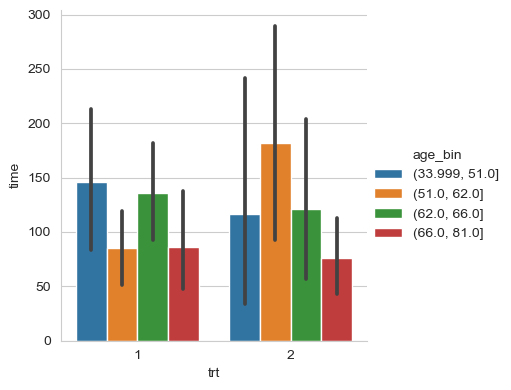

In [79]:
df['age_bin'] = edad
sns.catplot(data=df, x='trt',y='time', hue='age_bin', kind="bar",height=4,aspect=1)

In [80]:
# Pregunta de investigación: ¿Cuál es el promedio de edad de los pacientes en cada tipo de tratamiento?
table1 = pd.pivot_table(df, values='age',  index=['trt']).round(2)
table1

age
trt       
1    57.51
2    59.12

In [81]:
# Pregunta de investigación: ¿Cuál es el promedio de edad de los pacientes en cada tipo de tratamiento, separando a los que tuvieron o no tratamiento previo?
table2 = pd.pivot_table(df, values='age',  index=['trt'],columns=['prior_10'] ).round(2)
table2

prior_10      0      1
trt                   
1         57.19  58.24
2         60.73  54.95

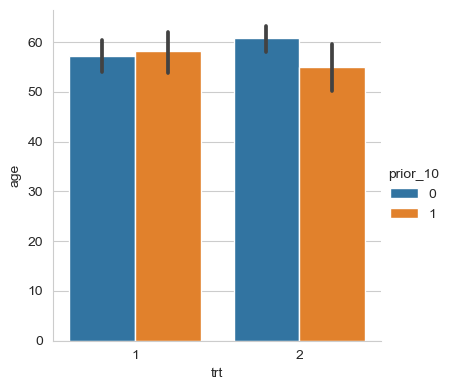

In [82]:
sns.catplot(data=df, x='trt',y='age', hue='prior_10', kind="bar",height=4,aspect=1)

In [83]:
# Pregunta de investigación: ¿Cuál es el promedio de días de vida desde que entraron al estudio de los pacientes en cada tipo de tratamiento,
# separando a los que tuvieron o no tratamiento previo?
table3 = pd.pivot_table(df, values='time',  index=['trt','prior_10'] ).round(2)
table3

time
trt prior_10        
1   0         121.00
    1         101.76
2   0         103.49
    1         191.95

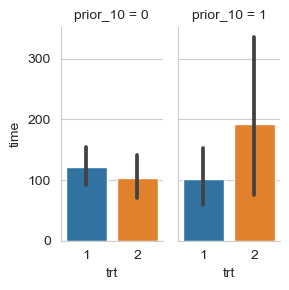

In [84]:
# La tabla anterior se corresponde con la gráfica siguiente, que además contiene una barra de dispersión
sns.catplot(data=df, x='trt', y='time',col='prior_10', kind='bar',height=3,aspect=0.5)

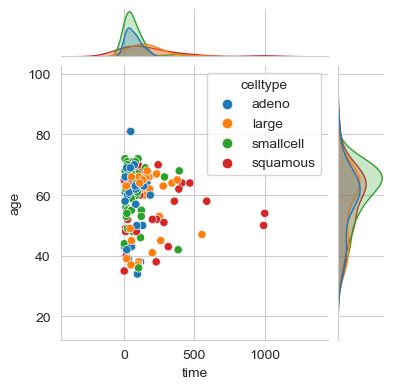

In [85]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",height=4)


### Interpretación
+ La mayor densidad de muertes tempranas es para pacientes con célula smallcell, seguido de adeno
+ El rango de edades más amplio es el de pacientes con célula adeno y tiene al los más longevos (pasados los 90 años)

### Limita a no graficar tiempo transcurrido menor que 0

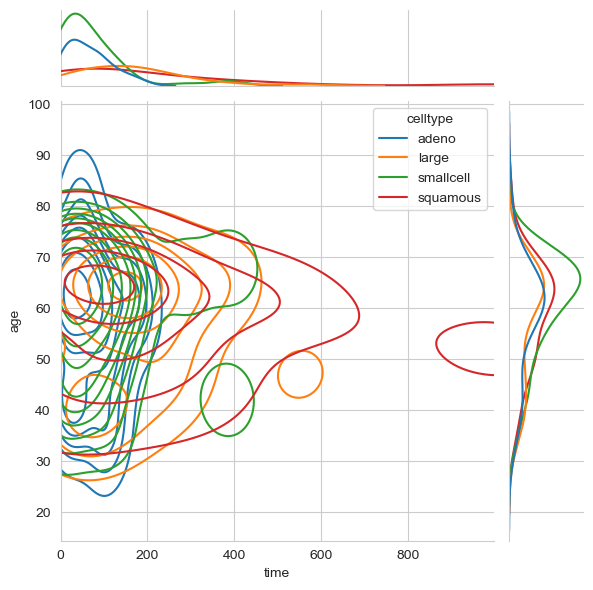

In [86]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",xlim=(0,df.time.max()),kind="kde")


### Interpretación

+ La mayoría de los pacientes tiene entre 60 y 70 años (diagrama de densidad vertical con curva verde)
+ La mayoría muere antes de los 200 días

In [87]:
df.columns

Index(['trt', 'prior', 'celltype', 'time', 'karno', 'diagtime', 'age', 'trt_1',
       'trt_2', 'celltype_adeno', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_0', 'status_1', 'prior_0', 'prior_10',
       'log_time', 'karno_bin', 'age_bin'],
      dtype='object')

## Tabla pivote con valores de medias de días hasta el fallecimiento (time) para cada combinación de dos variables categóricas: trt y celltype

In [88]:
ff = df[["celltype","trt","time"]]
cell_time = ff.pivot_table(index="trt",columns= "celltype",values="time")
cell_time.round(2)

celltype  adeno   large  smallcell  squamous
trt                                         
1         72.89  193.13      86.37    120.07
2         59.72  132.33      47.17    260.30

### Relación entre dos categóricas y una numérica usando relplot()

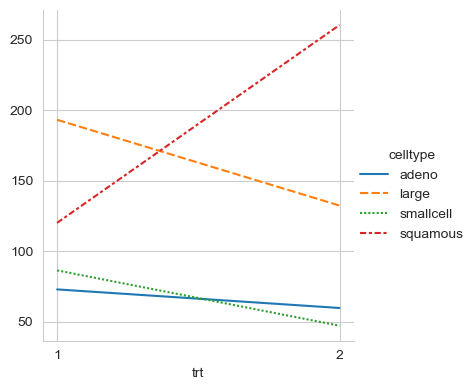

In [89]:

sns.relplot(data=cell_time, kind="line",height=4)

### Interpretación

+ Para adeno, large y small cell el tiempo de vida desciende con tratamiento 2. Indica que puede NO ES un tratamiento efectivo
+ Para squamous el tiempo de vida asciende con tratamiento 2, por lo que solo en este caso parece ser efectivo este tratamiento



### Diagrama de violín

+ Útil para analizar conjuntamente variables categóricas y numéricas

Un diagrama de violín juega un papel similar al de un diagrama de caja y bigotes. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones puedan compararse.__A diferencia de un diagrama de caja__, en el que todos los componentes del diagrama corresponden a puntos de datos reales, el diagrama de violín __presenta una estimación de la densidad del núcleo de la distribución subyacente__.

Esta puede ser una forma eficaz y atractiva de mostrar múltiples distribuciones de datos a la vez, pero tenga en cuenta que el procedimiento de estimación está influenciado por el tamaño de la muestra, y los violines para muestras relativamente pequeñas pueden parecer engañosamente fluidos.

También es importante tener en cuenta que un diagrama de barras muestra solo el valor medio (u otro estimador), pero en muchos casos __puede ser más informativo mostrar la distribución de valores en cada nivel de las variables categóricas__. En ese caso, otros enfoques, como un __diagrama de caja o de violín__, pueden ser más apropiados.

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='celltype', ylabel='karno'>

<Axes: xlabel='celltype', ylabel='karno'>

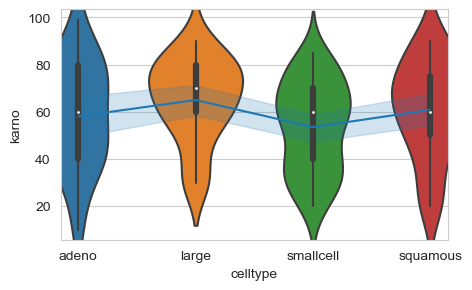

In [90]:
# entre celltype y karno
plt.figure(figsize=(5,3))
sns.violinplot(x=df["celltype"],y=df["karno"])
sns.lineplot(x=df["celltype"],y=df["karno"]) # agrega las medias y sombreado el intervalo con las desviaciones
plt.show()

<Figure size 500x400 with 0 Axes>

<Axes: xlabel='celltype', ylabel='karno'>

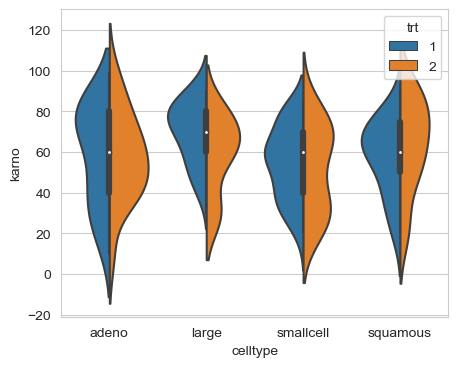

In [91]:
plt.figure(figsize=(5,4))
sns.violinplot(x=df["celltype"],y=df["karno"],hue=df["trt"], split=True)


## Análisis bivariado entre numéricas

+ __jointplot()__ de seaborn es un método especializado en gráficos bivariados. El primer diagrama que se muestra a continuación con jointplot(), grafica las distribuciones marginales de cada variable y el diagrama de dispersión de la distribución conjunta

+ __relplot()__ Interfaz a nivel de figura para dibujar diagramas relacionales en un FacetGrid.

     Esta función brinda acceso a varias funciones a nivel de ejes diferentes que muestran la relación entre dos variables con asignaciones semánticas de subconjuntos. El parámetro kind selecciona la función de nivel de ejes subyacente para usar:

        + diagrama de dispersión() (con kind="scatter"; el valor predeterminado)

        + lineplot() (con kind="line")


#### Combinaciones de a 2 de variables numéricas:
+ karno-age
+ karno-time
+ karno-diagtime
+ age-time
+ age-diagtime
+ time-diagtime

In [92]:
#sns.jointplot?
#sns.relplot?

#### Relación karno-age

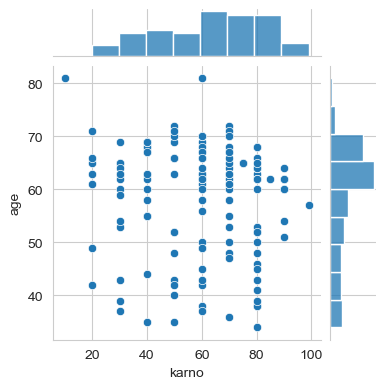

In [93]:

sns.jointplot(data=df, x="karno", y="age", height=4)

### Interpretación
+ Entre karno y age no hay relación lineal, ni aumentan o disminuyen conjuntamente

## Gráfica 3D

Text(0.5, 0, 'Karnovski index')

Text(0.5, 0.5, 'Edad del paciente')

Text(0.5, 0, 'Día de muerte')

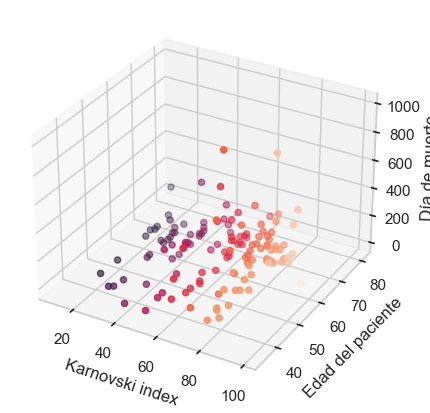

In [94]:
plt.rcParams["figure.figsize"] = (10,5)
sns.set(style = "whitegrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['karno']
y = df['age']
z = df['time']

ax.set_xlabel("Karnovski index")
ax.set_ylabel("Edad del paciente")
ax.set_zlabel("Día de muerte")

ax.scatter(x, y, z,c=x, marker='o')

plt.show()

#### Relación karno-time

+ El primer gráfico ya se había visualizado al inicio de este notebook en el pairplot().
+ Si colocamos el tiempo por eje de las x y usamos el tipo line observaremos dos series de tiempo. Aquí se escogió hue='trt'

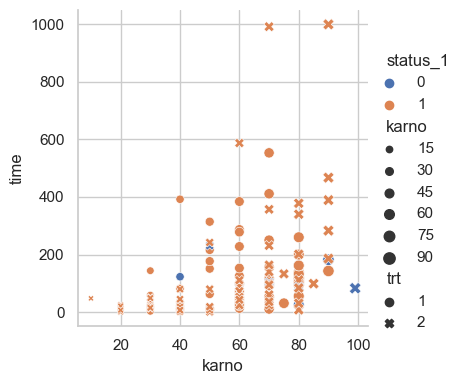

In [95]:
sns.relplot(data=df, x="karno", y="time", hue="status_1",height=4,size="karno", style="trt")

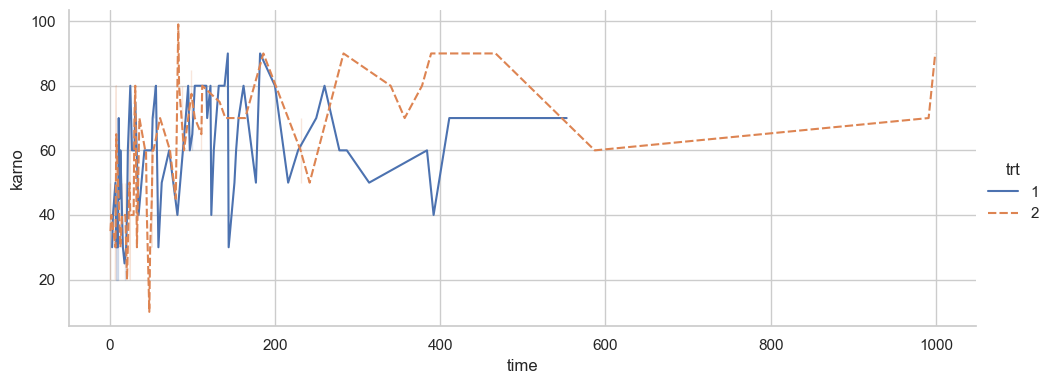

In [96]:
sns.relplot(data=df, x="time", y="karno", hue="trt",kind='line',style="trt",height=4,aspect=2.5)

### box plot entre karno (cardinalidad media) y time

<Axes: xlabel='karno', ylabel='time'>

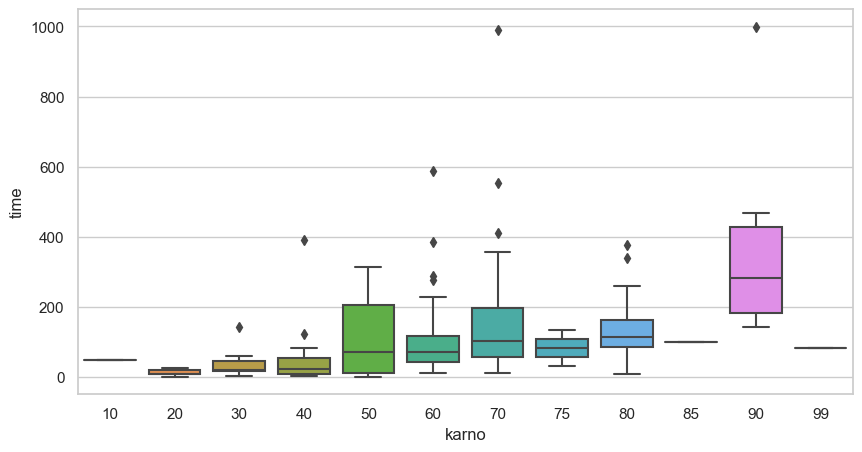

In [97]:
sns.boxplot(data=df,x='karno',y='time')

<Axes: xlabel='time', ylabel='karno'>

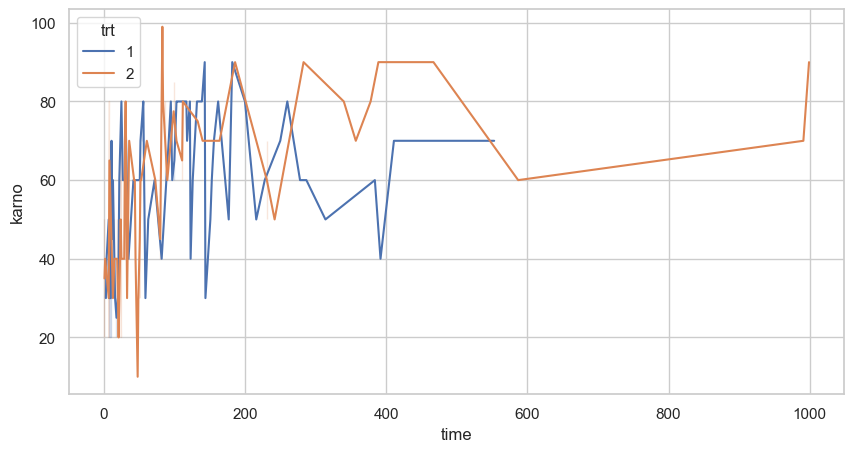

In [98]:
# Graficar la cantidad de muertes por día para cada tratamiento
sns.lineplot(data=df, x="time", y="karno", hue='trt')

####  Relación karno-diagtime

+ karno tiene mucha dispersión con los diagnósticos tempranos

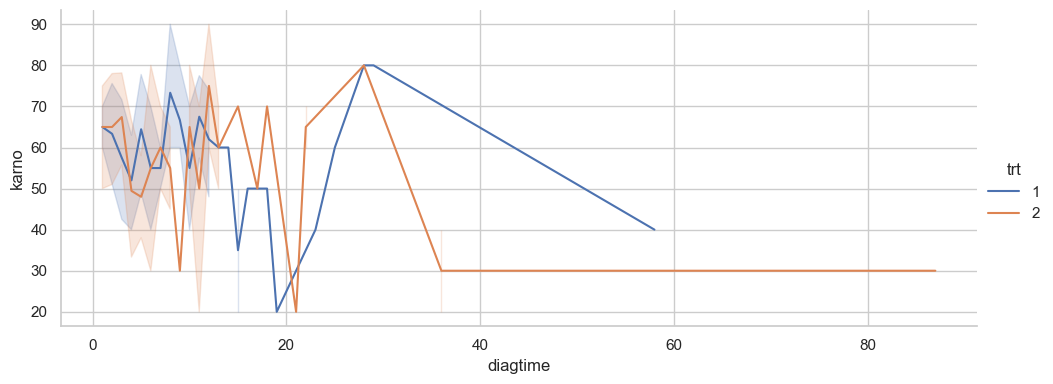

In [99]:

sns.relplot(data=df, x="diagtime", y="karno", hue="trt",kind='line',height=4,aspect=2.5)

####  Relación age-time

+ En el primer gráfico se añade al gráfico de dispersión la línea de regresión y a las distribuciones marginales se adiciona la densidad
+ En el segundo gráfico se hace un arreglo de subplots

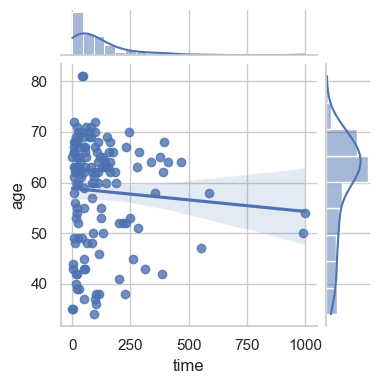

In [100]:
sns.jointplot(data=df, x="time", y="age",kind="reg",height=4)

### Interpretación

+ La mayoría murió antes de los 200 días
+ La mayoría de los pacientes tiene entre 60 y 70 años

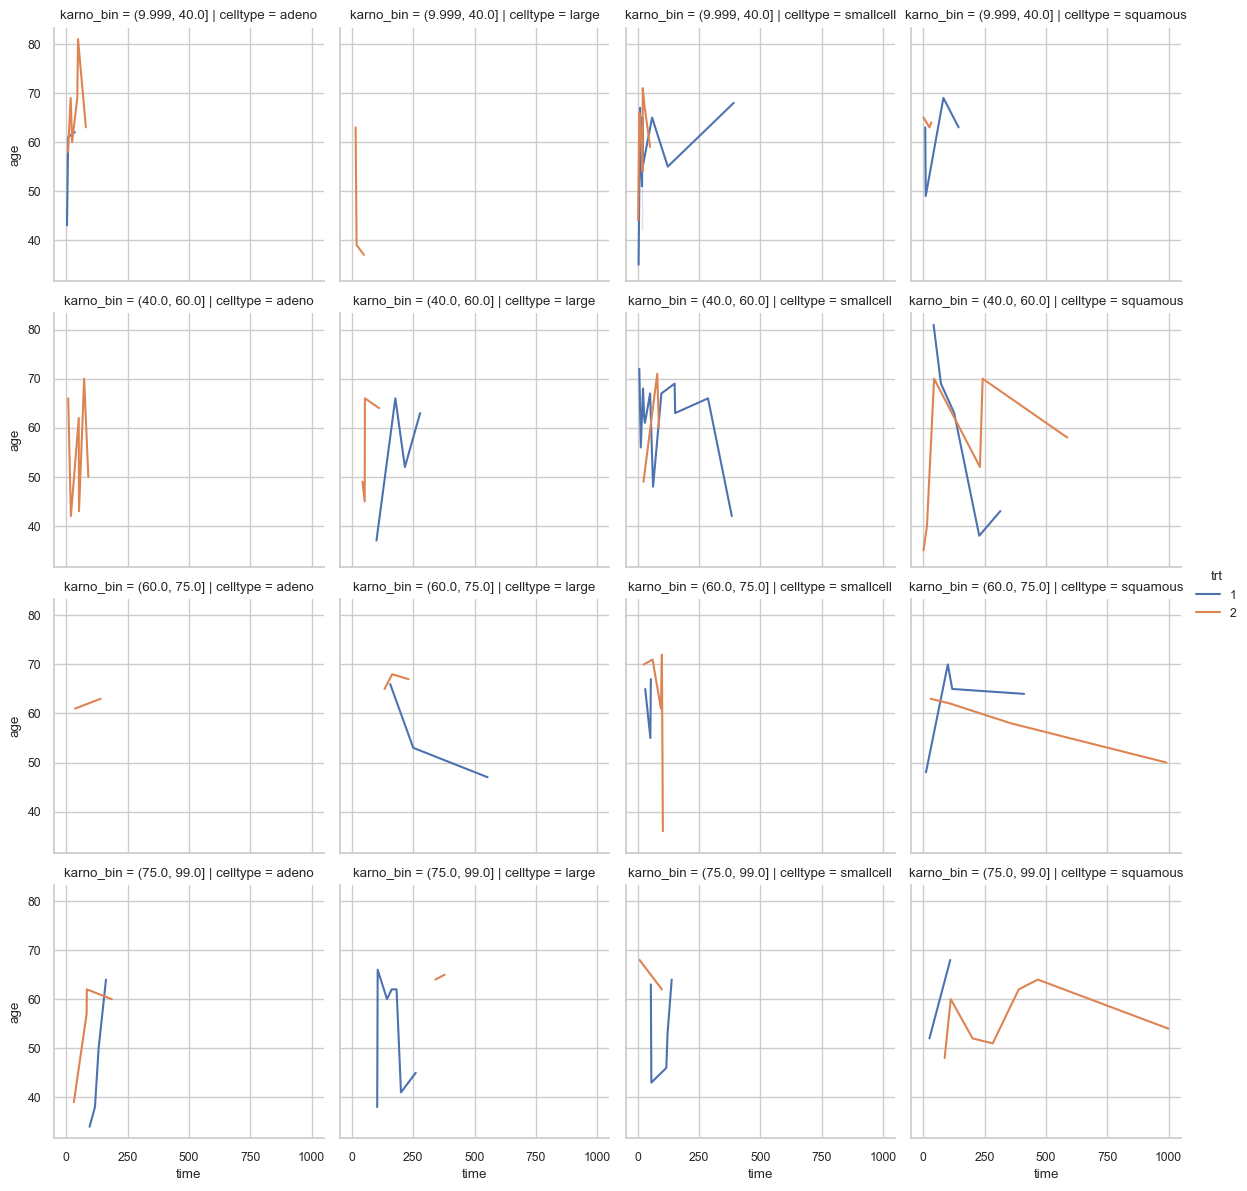

In [101]:
with sns.plotting_context("notebook", font_scale=0.8):
    
    sns.relplot(data=df, x="time", y="age", hue="trt",
                row="karno_bin", col="celltype",
                kind='line',
                height=3,aspect=1)


#### age-diagtime

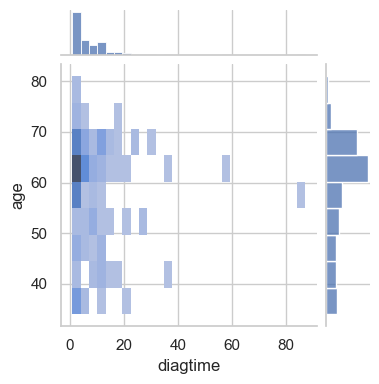

In [102]:
sns.jointplot(data=df, x="diagtime", y="age",kind="hist",height =4)

### Interpretación

+ El cuadro más oscuro indica la mayor concentración de edad con tiempo de diagnóstico que es entre 60 y 65 años en la primera semana del estudio

#### time-diagtime

In [103]:
df.diagtime.mean()

8.773722627737227

In [104]:
sns.relplot?

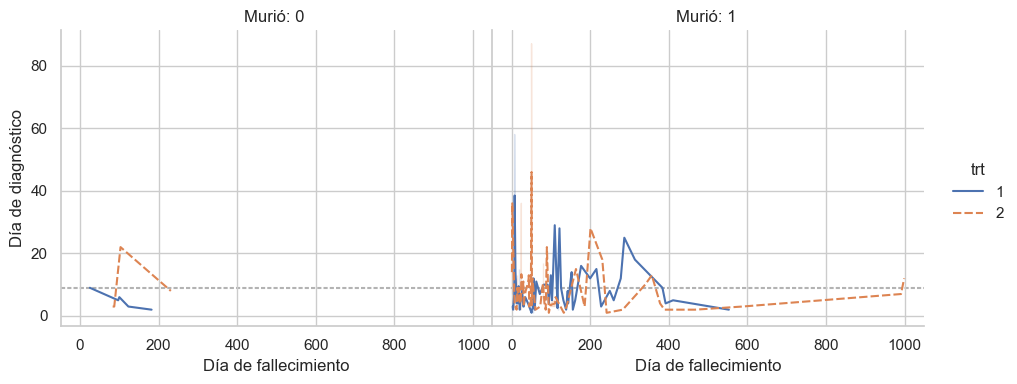

In [105]:
g = sns.relplot(
    data=df,
    x="time", y="diagtime",
    hue="trt", style="trt", col="status_1",
    height=4, aspect=1.2, kind="line",
    legend='brief'
)
# línea horizontal para la media de diagtime
(g.map(plt.axhline, y=df.diagtime.mean(), color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Día de fallecimiento", "Día de diagnóstico")
  .set_titles("Murió: {col_name} ")
  .tight_layout(w_pad=0))


In [106]:
df.time[df.trt == 1].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: time, dtype: float64

In [107]:
df.time[df.trt == 2].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: time, dtype: float64

In [108]:
df.trt.value_counts(normalize=True)

1    0.50365
2    0.49635
Name: trt, dtype: float64

In [109]:
cel_count = df.celltype.value_counts()
cel_count

smallcell    48
squamous     35
adeno        27
large        27
Name: celltype, dtype: int64

In [110]:
cel_count.values

array([48, 35, 27, 27], dtype=int64)

In [111]:
prop_cel = df.celltype.value_counts(normalize=True)
prop_cel

smallcell    0.350365
squamous     0.255474
adeno        0.197080
large        0.197080
Name: celltype, dtype: float64

### Guardar dataset con dummies y nuevas características

+ Hay nuevas columnas categóricas, después de hacer "binning" de algunas continuas
+ Hay nuevas columnas de razón después de aplicar una transformación logarítmica


In [112]:

df

trt prior  celltype  time  karno  ...  prior_0  prior_10  log_time  \
0     1     0  squamous    72     60  ...        1         0  1.857332   
1     1    10  squamous   411     70  ...        0         1  2.613842   
2     1     0  squamous   228     60  ...        1         0  2.357935   
3     1    10  squamous   126     60  ...        0         1  2.100371   
4     1    10  squamous   118     70  ...        0         1  2.071882   
..   ..   ...       ...   ...    ...  ...      ...       ...       ...   
132   2     0     large   133     75  ...        1         0  2.123852   
133   2     0     large   111     60  ...        1         0  2.045323   
134   2    10     large   231     70  ...        0         1  2.363612   
135   2     0     large   378     80  ...        1         0  2.577492   
136   2     0     large    49     30  ...        1         0  1.690196   

         karno_bin         age_bin  
0     (40.0, 60.0]    (66.0, 81.0]  
1     (60.0, 75.0]    (62.0, 66.0]  
2     (40.0, 60.0]  (33.999, 51.0]  
3     (40.0, 60.0]    (62.0, 66.0]  
4     (60.0, 75.0]    (62.0, 66.0]  
..             ...             ...  
132   (60.0, 75.0]    (62.0, 66.0]  
133   (40.0, 60.0]    (62.0, 66.0]  
134   (60.0, 75.0]    (66.0, 81.0]  
135   (75.0, 99.0]    (62.0, 66.0]  
136  (9.999, 40.0]  (33.999, 51.0]  

[137 rows x 20 columns]

## Guardar archivo con características originales y nuevas y archivo con los tipos de las columnas

In [113]:
# Guardar tipos de cada columna
tipos = pd.DataFrame(df.dtypes,columns=['dtypes'])

non_date = tipos[tipos['dtypes'] != 'datetime64[ns]']

non_date.to_csv('tipos_veteranos_feat.csv',index_label='columnas',header=['tipos'],encoding='utf_8')

In [114]:
'''import pickle

# Guardar lista de columnas datatime, si hubiere
lista_fechas = list(df_dum.dtypes[df_dum.dtypes == '<M8[ns]'].index)

np.save( "lista_fechas.npy", lista_fechas, allow_pickle=True)  # forma 1

# Forma 2
with open('lista_fechas.pkl','wb') as f:
    np.dump(lista_fechas)'''

'import pickle\n\n# Guardar lista de columnas datatime, si hubiere\nlista_fechas = list(df_dum.dtypes[df_dum.dtypes == \'<M8[ns]\'].index)\n\nnp.save( "lista_fechas.npy", lista_fechas, allow_pickle=True)  # forma 1\n\n# Forma 2\nwith open(\'lista_fechas.pkl\',\'wb\') as f:\n    np.dump(lista_fechas)'

In [115]:
df_dum.to_csv('dataset-25346_feat.csv',index=False,encoding='utf-8')